In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import os
import urllib

In [3]:
def geturl_legacy(ra, dec, size=240, band='r', layer='dr8-resid'):
    
    assert band in ['g', 'r', 'z']
    assert layer in ['dr8', 'dr8-resid', 'dr8-model']

    url = ("http://legacysurvey.org/viewer/fits-cutout/?ra={}&dec={}&layer={}&pixscale=0.27&bands={}&size={}").format(ra, dec, layer, band, size)
    return url

In [4]:
def clear_on_fail_(name, dir_path):
    for band in ['g', 'r', 'z']:
        for layer in ['dr8', 'dr8-resid', 'dr8-model']:
            output_image='{}/{}_{}_{}.fits'.format(dir_path, name, layer, band)
            try:
                os.remove(output_image)
            except:
                pass

def load_legacy_all(name=None, ra=None, dec=None, size=None, save_to=None):
    if not os.path.isdir(save_to):
        os.mkdir(save_to)
    
    for band in ['g', 'r', 'z']:
        for layer in ['dr8', 'dr8-resid', 'dr8-model']:
            try:
                fitsurl = geturl_legacy(ra, dec, band=band, size=size, layer=layer)
                output_image='{}/{}_{}_{}.fits'.format(save_to, name, layer, band)
                urllib.request.urlretrieve(fitsurl, output_image)
                if os.path.getsize(output_image)/1024 < 3:  # empirical threshold
                    clear_on_fail_(name, save_to)
                    break;break
            except Exception as e:
                clear_on_fail_(name, save_to)
                raise e

Example:

In [5]:
%%time
# load_legacy_all(name='1353_35_0_line6550', ra=123.7185078325, dec=1.5649554293, size=400, save_to='./fits/')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 7.63 µs


In [6]:
coords = {'NGC628' : (24.173946,15.783662),
          'NGC2403': (114.214167,65.602556),
          'NGC3344': (160.879792,24.922222),
          'NGC3893': (177.159125,48.710833),
          'NGC5371': (208.916425,40.461759),
          'NGC5676': (218.195194,49.457903)
         }

In [7]:
# for galname in coords.keys():
#     ra,dec = coords[galname]
#     load_legacy_all(name=galname, ra=ra, dec=dec, size=800, save_to='./fits/')

In [83]:
# for galname in ['NGC3344', 'NGC5371']:
#     ra,dec = coords[galname]
#     load_legacy_all(name=galname, ra=ra, dec=dec, size=1800, save_to='./fits/')

In [8]:
# for galname in ['NGC2403']:
#     ra,dec = coords[galname]
#     load_legacy_all(name=galname, ra=ra, dec=dec, size=3800, save_to='./fits/')

In [9]:
# for galname in ['NGC628']:
#     ra,dec = coords[galname]
#     load_legacy_all(name=galname, ra=ra, dec=dec, size=1800, save_to='./fits/')

In [84]:
import pyfits
from scipy.ndimage import rotate
from astropy.visualization import ZScaleInterval, PercentileInterval

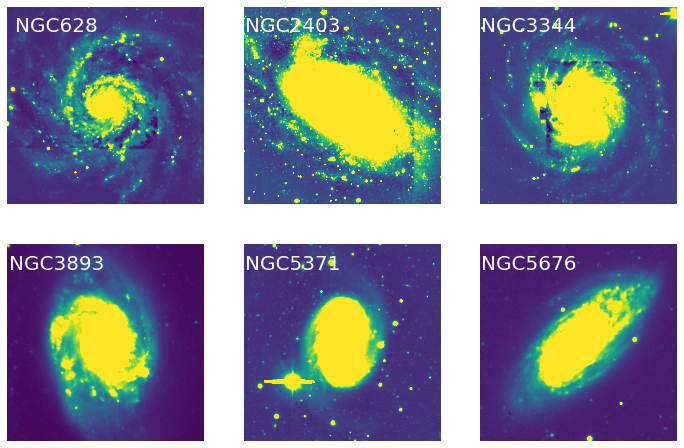

In [85]:
fig, axes = plt.subplots(figsize=[12,8], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name in enumerate(coords.keys()):
    hdulist = pyfits.open(f'./fits/{name}_dr8_g.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data
    
    ax = axes[ind]
    lims = ZScaleInterval().get_limits(img_data_raw)
    ax.imshow(img_data_raw, vmin=lims[0], vmax=lims[1])
    
    ax.text(0.25, 0.9, name,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=20,
           color='w')
    ax.axis('off')
    
plt.show()

In [86]:
posargs = '''NGC628 & $7\deg$ & $20\deg$ & 8.6 & Marchuk et al. (2018)\\
NGC2403 & $60\deg$ & $124.6\deg$ & 3.16 & Berg et al. (2013)\\
NGC3344 & $25\deg$ & $155\deg$ & 6.9 & Meidt et al. (2009)\\
NGC3893 & $49\deg$ & $343\deg$ & 15.5 & Font et al. (2019)\\
NGC5371 & $48\deg$ & $0\deg$ & 37.8 & Fathi et al. (2009)\\
NGC5676 & $63\deg$ & $223\deg$ & 34.7 & Salak et al. (2019)\\'''

posargs = [_.split(' & ') for _ in posargs.split('\n')]
posargs = {_[0] : (float(_[1].replace('\deg$', '').replace('$', '')), float(_[2].replace('\deg$', '').replace('$', ''))) for _ in posargs}

In [87]:
posargs

{'NGC628': (7.0, 20.0),
 'NGC2403': (60.0, 124.6),
 'NGC3344': (25.0, 155.0),
 'NGC3893': (49.0, 343.0),
 'NGC5371': (48.0, 0.0),
 'NGC5676': (63.0, 223.0)}

In [88]:
import rotima

In [93]:
# for name in posargs.keys():
    
#     incl,pa = posargs[name]
#     for band in ['g', 'r', 'z']:
#         hdulist = pyfits.open(f'./fits/{name}_dr8_{band}.fits')
#         hdr = hdulist[0].header
#         img_data_raw = hdulist[0].data

#         xcen = float(hdr['CRPIX1'])
#         ycen = float(hdr['CRPIX2'])
#         print(name, xcen, ycen)

#         rotima.cdeproject(infile=f'./fits/{name}_dr8_{band}.fits',
#                      outfile=f'./fits/{name}_dr8_{band}_deproject.fits',
#                      yCen=ycen,
#                      xCen=xcen,
#                      incl=incl,
#                      posang=-pa,
#                      workHDU=1)

NGC628 900.5 900.5
NGC628 900.5 900.5
NGC628 900.5 900.5
NGC2403 1500.5 1500.5
NGC2403 1500.5 1500.5
NGC2403 1500.5 1500.5
NGC3344 900.5 900.5
NGC3344 900.5 900.5
NGC3344 900.5 900.5
NGC3893 400.5 400.5
NGC3893 400.5 400.5
NGC3893 400.5 400.5
NGC5371 900.5 900.5
NGC5371 900.5 900.5
NGC5371 900.5 900.5
NGC5676 400.5 400.5
NGC5676 400.5 400.5
NGC5676 400.5 400.5


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log2
  # Remove the CWD from sys.path while we load stuff.
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log2
  # This is added back by InteractiveShellApp.init_path()


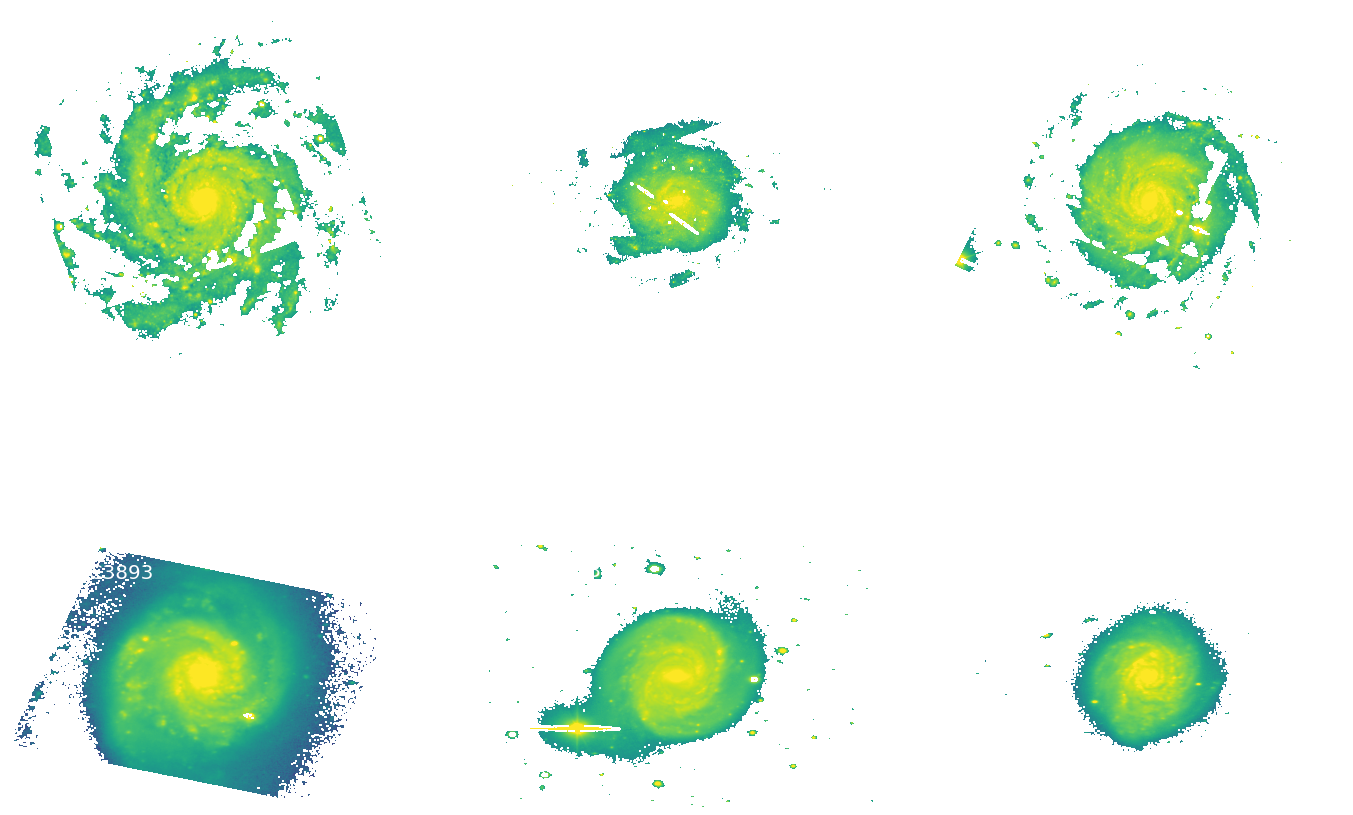

In [90]:
fig, axes = plt.subplots(figsize=[24,16], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name in enumerate(coords.keys()):
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data
    
    ax = axes[ind]
    lims = PercentileInterval(98).get_limits(np.log2(img_data_raw))
    ax.imshow(np.log2(img_data_raw), vmin=lims[0], vmax=lims[1])
    
    ax.text(0.25, 0.9, name,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=20,
           color='w')
    ax.axis('off')
    
plt.show()

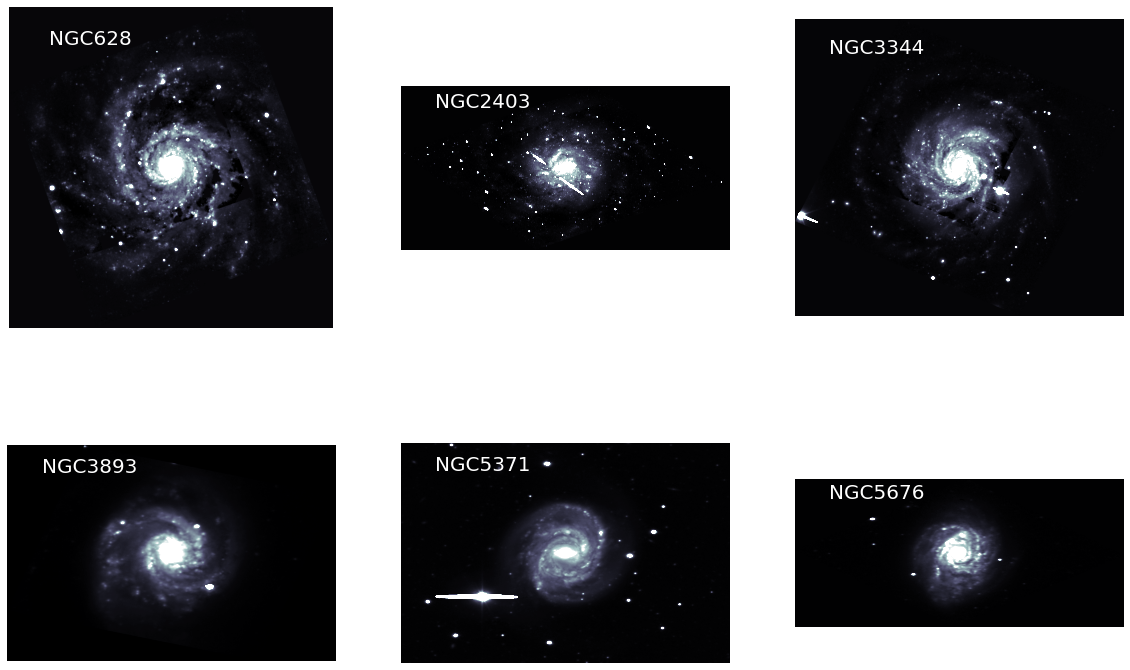

In [91]:
fig, axes = plt.subplots(figsize=[20,13], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name in enumerate(coords.keys()):
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data
       
    ax = axes[ind]
    lims = PercentileInterval(98.5).get_limits(img_data_raw)
    ax.imshow(img_data_raw, vmin=lims[0], vmax=lims[1], cmap=cm.bone)
    
    ax.text(0.25, 0.9, name,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=20,
           color='w')
    ax.axis('off')
    
plt.show()

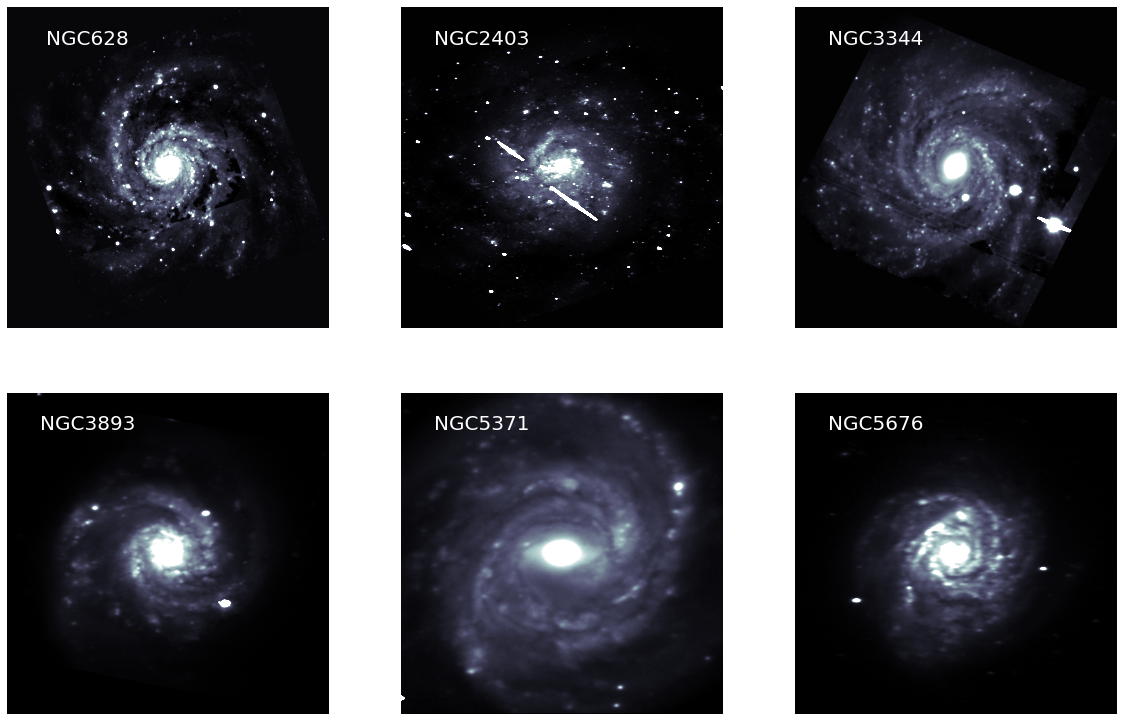

In [18]:
fig, axes = plt.subplots(figsize=[20,13], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name in enumerate(coords.keys()):
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data

    xl,yl = img_data_raw.shape
    x0,y0 = int(xl/2), int(yl/2)
    size = min(x0,y0)
    img_data_raw = img_data_raw[x0-size:x0+size, y0-size:y0+size]
    
    ax = axes[ind]
    lims = PercentileInterval(98.5).get_limits(img_data_raw)
    ax.imshow(img_data_raw, vmin=lims[0], vmax=lims[1], cmap=cm.bone)
    
    ax.text(0.25, 0.9, name,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=20,
           color='w')
    ax.axis('off')

plt.savefig('dataplot1.png', bbox_inches='tight')
plt.show()



In [19]:
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [20]:
info_by_galaxy = load_obj('/mnt/sdb2/science/spirals/fourier-spiral-masks/data/cr/info_by_galaxy')

In [21]:
dists = '''2903 8.83
3184 8.7
3344 6.1
5371 34.8
3893 18.6
3938 17
3992 17
6946 10.1
7793 3.1
628 9.7
5457 7.0
2403 3.2'''

In [22]:
dists = dists.split('\n')
dists = {'NGC'+l.split(' ')[0] : float(l.split(' ')[1]) for l in dists}

In [23]:
dists

{'NGC2903': 8.83,
 'NGC3184': 8.7,
 'NGC3344': 6.1,
 'NGC5371': 34.8,
 'NGC3893': 18.6,
 'NGC3938': 17.0,
 'NGC3992': 17.0,
 'NGC6946': 10.1,
 'NGC7793': 3.1,
 'NGC628': 9.7,
 'NGC5457': 7.0,
 'NGC2403': 3.2}

In [24]:
from astropy import units as u

theta = 1*u.arcsec
d_A = 8.83*u.Mpc

theta_radian = theta * np.pi / 180 / 3600

# arc length = radius * angle
distance_Mpc = d_A * theta_radian

print(distance_Mpc) # 3.3846475 Mpc

4.280904804197203e-05 arcsec Mpc


In [25]:
scales = {}
for k in dists:
    theta = 1*u.arcsec
    d_A = dists[k]*u.Mpc
    theta_radian = theta * np.pi / 180 / 3600
    distance_Mpc = d_A * theta_radian
    scales[k] = distance_Mpc.value*1000. #kpc/arcsec

In [26]:
scales

{'NGC2903': 0.042809048041972025,
 'NGC3184': 0.04217879025652963,
 'NGC3344': 0.029573634547681693,
 'NGC5371': 0.16871516102611853,
 'NGC3893': 0.0901753446863737,
 'NGC3938': 0.08241832578862111,
 'NGC3992': 0.08241832578862111,
 'NGC6946': 0.048966181792063135,
 'NGC7793': 0.015029224114395615,
 'NGC628': 0.047026927067624985,
 'NGC5457': 0.033936957677667516,
 'NGC2403': 0.015514037795505153}

In [27]:
# def epic_freq(vel_poly, R, dR):
#     return sqrt(2.) * vel_poly(R) / R * np.sqrt(1 + R * vel_poly.deriv()(R) / vel_poly(R) / dR)


def epic_freq(vel_poly, R, dR):
    return sqrt(2.) * vel_poly(R) / R

In [28]:
r25s = load_obj('/mnt/sdb2/science/spirals/CR_Olya/vel_curves/disc_r25_sizes')

In [29]:
import pandas as pd
df = pd.read_csv('/mnt/sdb2/science/spirals/CR_Olya/vel_curves/total_crs.csv', index_col=0)
df.sample(5)

name             method    bar     kind       bands  \
746    NGC3319  potential-density  False  stellar      H-band   
345    UGC9248                F-B  False      ISM  Halpha, HI   
1131   NGC3423              morph  False  stellar     optical   
889    NGC4902  potential-density  False  stellar      H-band   
433   UGC11283                F-B  False      ISM  Halpha, HI   

                                                   link  \
746   https://iopscience.iop.org/article/10.1088/006...   
345                                                 NaN   
1131  http://articles.adsabs.harvard.edu/pdf/1995ApJ...   
889   https://iopscience.iop.org/article/10.1088/006...   
433                                                 NaN   

                        paper_name    cr  err_cr_l  err_cr_r  cr_l  cr_r  \
746            Buta & Zhang (2009)   9.5       0.0       0.0   9.5   9.5   
345                      F-B works  30.4       2.2       2.2  28.2  32.6   
1131  Elmegreen & Elmegreen (1995)  43.8       1.2       1.2  42.6  45.0   
889            Buta & Zhang (2009)  38.6       0.0       0.0  38.6  38.6   
433                      F-B works  30.7       1.8       1.8  28.9  32.5   

      err_range   altname         r25  
746         0.0  NGC 3319  108.923416  
345         4.4  NGC 5622   40.097865  
1131        2.4  NGC 3423  106.689396  
889         0.0  NGC 4902   80.005760  
433         3.6   IC 1291   40.005643

In [30]:
df[df['name']=='NGC5676']

name             method    bar     kind        bands  \
17    NGC5676                F-B  False      ISM   Halpha, HI   
18    NGC5676                F-B  False      ISM   Halpha, HI   
19    NGC5676                F-B  False      ISM   Halpha, HI   
20    NGC5676                F-B  False      ISM   Halpha, HI   
931   NGC5676  potential-density  False  stellar       H-band   
932   NGC5676  potential-density  False  stellar       H-band   
933   NGC5676  potential-density  False  stellar       H-band   
1233  NGC5676              model  False     both  NIR, Halpha   

                                                   link           paper_name  \
17                                                  NaN            F-B works   
18                                                  NaN            F-B works   
19                                                  NaN            F-B works   
20                                                  NaN            F-B works   
931   https://iopscience.iop.org/article/10.1088/006...  Buta & Zhang (2009)   
932   https://iopscience.iop.org/article/10.1088/006...  Buta & Zhang (2009)   
933   https://iopscience.iop.org/article/10.1088/006...  Buta & Zhang (2009)   
1233         https://arxiv.org/pdf/astro-ph/0212290.pdf  Kranz et al. (2003)   

             cr   err_cr_l  err_cr_r       cr_l       cr_r  err_range  \
17    18.400000   1.900000  1.900000  16.500000  20.300000   3.800000   
18    32.100000   1.700000  1.700000  30.400000  33.800000   3.400000   
19    54.400000   2.400000  2.400000  52.000000  56.800000   4.800000   
20    76.500000   4.600000  4.600000  71.900000  81.100000   9.200000   
931   23.200000   0.000000  0.000000  23.200000  23.200000   0.000000   
932   38.200000   0.000000  0.000000  38.200000  38.200000   0.000000   
933   61.200000   0.000000  0.000000  61.200000  61.200000   0.000000   
1233  68.754935  12.500897  6.250449  56.254038  75.005384  18.751346   

       altname        r25  
17    NGC 5676  107.67658  
18    NGC 5676  107.67658  
19    NGC 5676  107.67658  
20    NGC 5676  107.67658  
931   NGC 5676  107.67658  
932   NGC 5676  107.67658  
933   NGC 5676  107.67658  
1233  NGC 5676  107.67658

NGC2403 SPARC arcsec
NGC2403 THINGS arcsec
NGC3344  kpc
NGC3893 SV89 kpc
NGC5676 WHISP arcsec
NGC628 Ts kpc


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_laun

NGC5371 Sa96 kpc


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:157: RuntimeWarning: divide by zero encountered in double_scalars


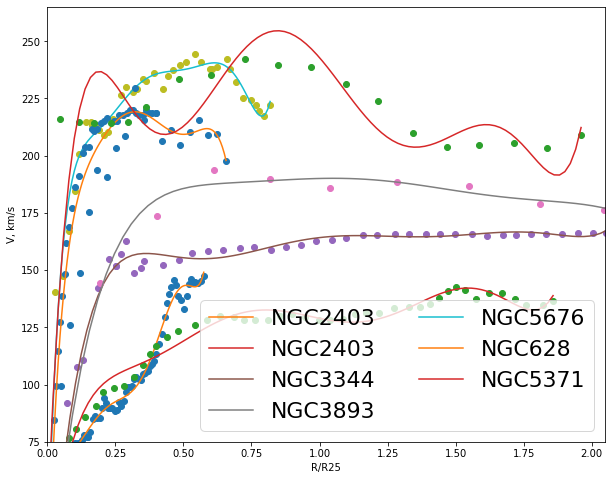

In [31]:
# d_path = './vel_curves/data/'
d_path = '/mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/'
ffnames = os.listdir(d_path)

vel_data = {}

fig = plt.figure(figsize=[10,8])
ax = plt.gca()

for fname in ffnames[2:]:
# for fname in ['NGC5676_WHISP_arcsec.data']:
    if '.png' in fname:
        continue
        
    if fname == 'Be87_NGC5371_kpc.data':
        continue
    
#     print('='*50)
#     print(fname)
    data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=',')
    if type(data[0])==np.float64:
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=' ')
    
    
   
    tmps = fname.replace('.data', '').replace('.dat', '').split('_')
    if len(tmps) == 2:
        name, units = tmps
        name2 = ''
    elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
        name, name2, units = tmps
    else:
        name2, name, units = tmps
    
    if name not in list(coords.keys()) and name2 not in coords.keys():
        continue
        
    print(name, name2, units)
    if name  == 'NGC2403' and name2 != 'THINGS':
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter='  ')
    
    if units == 'kpc':
        data[:,0] = data[:,0]/scales[name]
        units = 'arcsec'
    
    if units == 'arcmin':
        data[:,0] = data[:,0]*60.
        units = 'arcsec'
    
    
    #correct systemic velocity in several cases, ssee Appendix
    if name == 'UGC6263':
        data[:,1] = data[:,1]+58.
    if name == 'UGC6778':
        data[:,1] = data[:,1]+14.
    if name == 'UGC5557':
        data[:,1] = data[:,1]+13.
    if name == 'NGC0753':
        data[:,1] = data[:,1]+35.
    if name == 'NGC5676':
        data[:,1] = data[:,1]+40.
        tmp = '''0.8011099915759701, 59.92633091623861
                3.06734279248775, 140.62370955220433
                6.303166449183209, 147.6107100972896
                8.481855271634089, 167.24616375679295
                11.015675327464066, 184.58565269817154
                12.472539270907333, 200.74825324986375
                15.359838786937758, 214.63966568110868
                17.15201268561802, 214.6809600105713
                17.867230471911597, 213.5453659503478
                19.30096959085577, 213.57840141391785
                20.372970383706928, 211.298954427578
                22.520275515766173, 209.04428403891575
                23.955666407888856, 210.2294312944947
                26.11453395219769, 216.03954344989347
                28.996878148692616, 226.47462050511228
                31.152442146644404, 229.98050907649372
                34.01661683817579, 227.7423564196165
                35.452007730298504, 228.92750367519534
                37.9676582811648, 233.593762904478
                39.04131084719444, 232.46642771014683
                42.2721791843544, 235.99709287920587
                45.84661634264384, 229.1670107860789
                47.64704910721659, 234.9688640755851
                49.800961331989896, 237.32264085495774
                52.67174311623526, 239.69293536611553
                54.82400356783006, 240.89460035347952
                58.41330668472605, 244.433524388431
                60.917394823342846, 241.03500107365267
                64.49678730116779, 237.6612543565517
                65.2136568606399, 237.67777208833684
                67.00748253249861, 238.87117820980814
                70.95522042913063, 242.4183611106523
                72.38235245536083, 237.84294940618759
                74.52470226788455, 232.13194364149922
                77.3822698667019, 225.2853438165871
                80.60653111114777, 224.20756181761112
                82.39540146347105, 221.94463256305653
                83.8258370360582, 219.67344444260914
                85.61470738838142, 217.41051518805443
                88.1303579392478, 222.0767744173371'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
#         data = np.concatenate([data, np.array(tmp)])
        data = np.array(tmp) #we use Halpha rot map instead - this is correct, see Appendix notes (Valeria not get it perfectly accurate)
        
        
    if name == 'NGC7741':
        data[:,1] = data[:,1]+4.
    if name  == 'NGC628':
        tmp = '''4.94637079738348, 47.29018716149051
        14.743295929425287, 99.19343270602502
        25.245004376178798, 126.1217810431331
        35.170917518275175, 148.92721983210265
        44.86395743283603, 175.61210470105823
        54.56103172477478, 193.56760551858002
        64.84544412331299, 190.6702781815268
        74.89160412447846, 203.29157565970476
        84.71015800190736, 208.39562337294123
        94.98336379661806, 229.74658506764868
        105.04196312803208, 215.45228172057233
        124.91900427083672, 206.50450897705
        134.3910499579192, 211.3656535523253
        144.90833558399297, 204.58888013528613
        154.9577455002684, 210.1781737942535
        164.77618731165902, 215.52470439780757
        175.17770872019463, 209.23275667885574
        184.8829638329275, 209.48700650319222
        194.70925026699734, 197.85973478451382'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
        data = np.concatenate([data, np.array(tmp)]) 
        
    
    r25  = df[df['name'] == name]['r25'].values[0]
    
    plt.plot(np.abs(data[:,0])/r25, np.abs(data[:,1]), 'o')
    plt.ylim(0)
#     plt.title(name)
#     plt.xlabel(f'R, {units}')
    
    
    vel = np.abs(data[:,1])
    rad = np.abs(data[:,0])
    
    vel = np.concatenate([[0.0], vel])
    rad = np.concatenate([[0.0], rad])
    
    points = np.linspace(min(rad), max(rad), 100)
    velocity_approx = np.poly1d(np.polyfit(rad, vel, deg=7))
    
    line = plt.plot(points/r25, velocity_approx(points), label=name)
    
    dR = (max(rad) - min(rad)) / 20
    kappa = [epic_freq(velocity_approx, r, dR) for r in points]
    
    omega = [v/r for r,v in zip(points, velocity_approx(points))]
 
    
plt.xlabel('R/R25')
plt.ylabel('V, km/s')
plt.ylim(75,265)
plt.xlim(0,2.05)
plt.legend(fontsize=22, ncol=2)
# plt.yscale('log')

plt.savefig('rotvels.png', bbox_inches='tight')
plt.show()

In [32]:
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [33]:
total_crs = load_obj('/mnt/sdb2/science/spirals/CRs/data/crs/total_crs')

In [34]:
all_gals = list()
for ind, entry in enumerate(total_crs):
    if entry[0]['method'] == 'SNs':
        continue
    gals = list(entry[0]['names_map'].values())
    all_gals = all_gals + gals
    
len(all_gals), len(set(all_gals))

(1063, 655)

Already loaded:

In [35]:
already_loaded = []
for fname in os.listdir('/mnt/sdb2/science/spirals/CR_Olya/vel_curves/vel_curves/data'):
    for prt in fname.split('_'):
        if 'NGC' in prt or 'UGC' in prt:
            already_loaded.append(prt)
            
set(already_loaded)

{'NGC2903',
 'NGC3184',
 'NGC3344',
 'NGC3893',
 'NGC3938',
 'NGC3992',
 'NGC5371',
 'UGC4273',
 'UGC508',
 'UGC5557',
 'UGC5840',
 'UGC6118',
 'UGC6263',
 'UGC6778',
 'UGC6856',
 'UGC6937',
 'UGC9797'}

In [36]:
import requests
import time
from IPython.display import HTML
from IPython.display import Image
import pylab as plt
import pandas as pd
from astroquery.ned import Ned
import matplotlib.image as mpimg
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['size', 'plt', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [37]:
%%time
spirals_set = {}
reverse_spirals_set = {}
for c in list(set(already_loaded)):
    try:
        result_table = Ned.query_object(c)
        spirals_set[result_table[0]['Object Name']] = c
        reverse_spirals_set[c] = result_table[0]['Object Name']
    except Exception as e:
        print(e, c)

CPU times: user 309 ms, sys: 16.6 ms, total: 326 ms
Wall time: 412 ms


In [38]:
spirals_set

{'NGC 3344': 'UGC5840',
 'NGC 3938': 'UGC6856',
 'NGC 3893': 'NGC3893',
 'NGC 3504': 'UGC6118',
 'NGC 3583': 'UGC6263',
 'NGC 2543': 'UGC4273',
 'NGC 2903': 'NGC2903',
 'NGC 0266': 'UGC508',
 'MESSIER 109': 'NGC3992',
 'NGC 3184': 'UGC5557',
 'NGC 5371': 'NGC5371',
 'NGC 5905': 'UGC9797'}

In [39]:
reverse_spirals_set

{'NGC3344': 'NGC 3344',
 'NGC3938': 'NGC 3938',
 'UGC6778': 'NGC 3893',
 'UGC6118': 'NGC 3504',
 'UGC6263': 'NGC 3583',
 'UGC4273': 'NGC 2543',
 'NGC2903': 'NGC 2903',
 'UGC5840': 'NGC 3344',
 'UGC508': 'NGC 0266',
 'UGC6937': 'MESSIER 109',
 'NGC3184': 'NGC 3184',
 'NGC5371': 'NGC 5371',
 'UGC5557': 'NGC 3184',
 'NGC3992': 'MESSIER 109',
 'UGC6856': 'NGC 3938',
 'NGC3893': 'NGC 3893',
 'UGC9797': 'NGC 5905'}

In [40]:
reverse_spirals_set['NGC2403'] = 'NGC 2403'
reverse_spirals_set['NGC628'] = 'NGC 628'
reverse_spirals_set['NGC628'] = 'NGC0628'
reverse_spirals_set['NGC5676'] = 'NGC 5676'

In [41]:
method_color = {'F-B' : 'gray',
 'P-D' : 'black',
 'SNs' : 'red',
 'T-W' : 'blue',
 'bar-torque' : 'limegreen',
 'gaps' : 'thistle',
 'metallicity' : 'green',
 'model' : 'magenta',
 'morph' : 'yellow',
 'offset' : 'red',
 'potential-density' : 'cyan',
 'rings' : 'sienna',
 'spiral' : 'goldenrod', 'spirals' : 'goldenrod'}

In [42]:
from shapely.geometry import Point, LineString
from shapely.geometry.polygon import Polygon
import shapely

In [80]:
consist = {
'MESSIER 063' : [(160 , 210)], #very spec.
'NGC0628' : [(80 , 100), (130, 160)], #signif. errors
'NGC 3504' : [(41 , 49)], #conf by 4
'NGC 3513' : [(50 , 63)], #broad
'NGC 3596' : [(19 , 23), (32, 36), (46,49)], #very spec.
'MESSIER 058' : [(23 , 26), (47, 52), (70,90)], #last by 4
'MESSIER 061' : [(43, 48), (78,92)], #very spec.
'NGC 0864' : [(6 , 8), (26,37), (56,58), (75,87)], #interesting case
'NGC 0895' : [(52 , 75)],
'NGC 3686' : [(32 , 46)],
'NGC 4051' : [(70 , 110)], #meh
'NGC 2903' : [(140 , 175)],
'NGC 6951' : [(65 , 82)],
'IC 0342' : [(264, 370), (436, 636)], #only by two agreed
'NGC 0753' : [(23 , 33)], #meh
'NGC 3338' : [(45 , 55)],
'NGC 4123' : [(50 , 72)],
'NGC 4939' : [(70 , 90)],
'NGC 5850' : [(23,30), (62, 82), (95, 110)], #only by two agreed
'NGC 0578' : [(70 , 95)],
'NGC 5371' : [(37, 49), (70, 83), (93,97)], # second is very specul, but last is too maybe
'NGC 7552' : [(60, 83)],
'NGC 3344' : [(72,81), (111 , 128)],
'NGC 5676' : [(20 , 23), (34, 41), (60, 70)], #only by two
'NGC 5701' : [(17,19), (65 , 75)], #very spec.
'NGC 5921' : [(59 , 79)],
'NGC 6946' : [(120 , 170), (245,255)], #spec.
'MESSIER 101' : [(110 , 180), (290,350), (470,515)], #first is less constrained and may be wrong
'NGC 3061' : [(14 , 16), (21,23), (33, 36)], #very spec. and by two only
'NGC 3893' : [(15 , 20), (33, 39), (60,70)], #only one by three (but maybe first two, just not long spiral)
'NGC 7741' : [(45, 57), (63, 76), (102, 114)], #same as 3893
# all auto confirmed by consisted below    
'MESSIER 031' : [(4100,4300)], #only one
'NGC 0514' : [(30,40)], #only one
'NGC 7793' : [(100,200)], #only one
'NGC 4535' : [(55,85)], #only one
    'NGC 4665' : [(16,19), (46, 60)],  #only by two agreed
    'NGC 7496' : [(30,55)], #veeeery spec. and broad errors,
    'NGC 2403' : [(205,235), (287,297), (380,400)]
}

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:239: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWa

ke: NGC 2403
[(205, 235), (287, 297), (380, 400)]
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
ke: NGC 2403
[(205, 235), (287, 297), (380, 400)]
ke: NGC 3344
[(72, 81), (111, 128)]
++++++
'list' object has no attribute 'xy'
ke: NGC 3893
[(15, 20), (33, 39), (60, 70)]
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
ke: NGC 5676
[(20, 23), (34, 41), (60, 70)]
++++++
'list' object has no attribute 'xy'
ke: NGC0628
[(80, 100), (130, 160)]
++++++
'list' object has no attribute 'xy'
ke: NGC 5371
[(37, 49), (70, 83), (93, 97)]


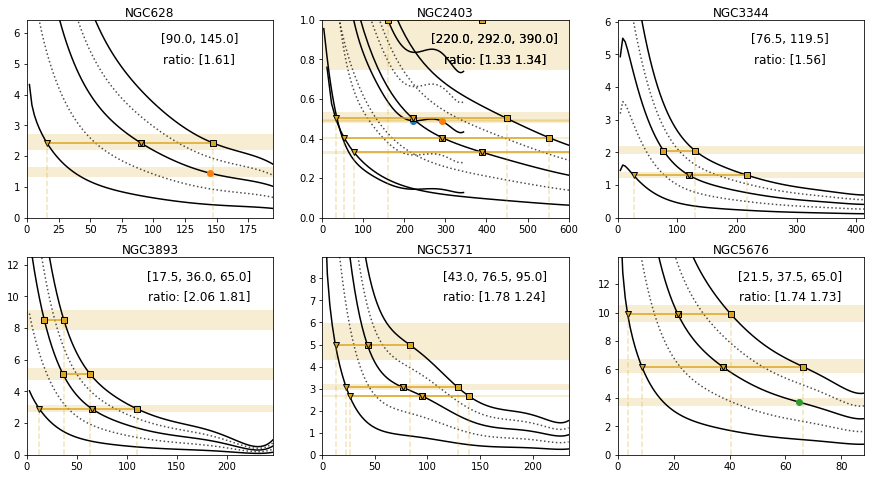

In [81]:
# d_path = './vel_curves/data/'
d_path = '/mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/'
ffnames = os.listdir(d_path)

vel_data = {}

fig, axes = plt.subplots(figsize=[15,8], ncols=3, nrows=2)
axes=axes.flatten()
ax_by_name = {'NGC628': axes[0],
 'NGC2403': axes[1],
 'NGC3344': axes[2],
 'NGC3893': axes[3],
 'NGC5371': axes[4],
 'NGC5676': axes[5]}


rings = {}

for fname in ffnames[2:]:
# for fname in ['NGC5676_WHISP_arcsec.data']:
    if '.png' in fname:
        continue
        
    if fname == 'Be87_NGC5371_kpc.data':
        continue
    
#     print('='*50)
#     print(fname)
    data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=',')
    if type(data[0])==np.float64:
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=' ')
    
    
   
    tmps = fname.replace('.data', '').replace('.dat', '').split('_')
    if len(tmps) == 2:
        name, units = tmps
        name2 = ''
    elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
        name, name2, units = tmps
    else:
        name2, name, units = tmps
    
    if name not in list(coords.keys()) and name2 not in coords.keys():
        continue
        
#     print(name, name2, units)
    if name  == 'NGC2403' and name2 != 'THINGS':
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter='  ')
    
    if units == 'kpc':
        data[:,0] = data[:,0]/scales[name]
        units = 'arcsec'
    
    if units == 'arcmin':
        data[:,0] = data[:,0]*60.
        units = 'arcsec'
    
    
    #correct systemic velocity in several cases, ssee Appendix
    if name == 'UGC6263':
        data[:,1] = data[:,1]+58.
    if name == 'UGC6778':
        data[:,1] = data[:,1]+14.
    if name == 'UGC5557':
        data[:,1] = data[:,1]+13.
    if name == 'NGC0753':
        data[:,1] = data[:,1]+35.
    if name == 'NGC5676':
        data[:,1] = data[:,1]+40.
        tmp = '''0.8011099915759701, 59.92633091623861
                3.06734279248775, 140.62370955220433
                6.303166449183209, 147.6107100972896
                8.481855271634089, 167.24616375679295
                11.015675327464066, 184.58565269817154
                12.472539270907333, 200.74825324986375
                15.359838786937758, 214.63966568110868
                17.15201268561802, 214.6809600105713
                17.867230471911597, 213.5453659503478
                19.30096959085577, 213.57840141391785
                20.372970383706928, 211.298954427578
                22.520275515766173, 209.04428403891575
                23.955666407888856, 210.2294312944947
                26.11453395219769, 216.03954344989347
                28.996878148692616, 226.47462050511228
                31.152442146644404, 229.98050907649372
                34.01661683817579, 227.7423564196165
                35.452007730298504, 228.92750367519534
                37.9676582811648, 233.593762904478
                39.04131084719444, 232.46642771014683
                42.2721791843544, 235.99709287920587
                45.84661634264384, 229.1670107860789
                47.64704910721659, 234.9688640755851
                49.800961331989896, 237.32264085495774
                52.67174311623526, 239.69293536611553
                54.82400356783006, 240.89460035347952
                58.41330668472605, 244.433524388431
                60.917394823342846, 241.03500107365267
                64.49678730116779, 237.6612543565517
                65.2136568606399, 237.67777208833684
                67.00748253249861, 238.87117820980814
                70.95522042913063, 242.4183611106523
                72.38235245536083, 237.84294940618759
                74.52470226788455, 232.13194364149922
                77.3822698667019, 225.2853438165871
                80.60653111114777, 224.20756181761112
                82.39540146347105, 221.94463256305653
                83.8258370360582, 219.67344444260914
                85.61470738838142, 217.41051518805443
                88.1303579392478, 222.0767744173371'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
#         data = np.concatenate([data, np.array(tmp)])
        data = np.array(tmp) #we use Halpha rot map instead - this is correct, see Appendix notes (Valeria not get it perfectly accurate)
        
        
    if name == 'NGC7741':
        data[:,1] = data[:,1]+4.
    if name  == 'NGC628':
        tmp = '''4.94637079738348, 47.29018716149051
        14.743295929425287, 99.19343270602502
        25.245004376178798, 126.1217810431331
        35.170917518275175, 148.92721983210265
        44.86395743283603, 175.61210470105823
        54.56103172477478, 193.56760551858002
        64.84544412331299, 190.6702781815268
        74.89160412447846, 203.29157565970476
        84.71015800190736, 208.39562337294123
        94.98336379661806, 229.74658506764868
        105.04196312803208, 215.45228172057233
        124.91900427083672, 206.50450897705
        134.3910499579192, 211.3656535523253
        144.90833558399297, 204.58888013528613
        154.9577455002684, 210.1781737942535
        164.77618731165902, 215.52470439780757
        175.17770872019463, 209.23275667885574
        184.8829638329275, 209.48700650319222
        194.70925026699734, 197.85973478451382'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
        data = np.concatenate([data, np.array(tmp)]) 
        
    
    r25  = df[df['name'] == name]['r25'].values[0]
    
#     plt.plot(np.abs(data[:,0])/r25, np.abs(data[:,1]), 'o')
#     plt.ylim(0)
#     plt.title(name)
#     plt.xlabel(f'R, {units}')
    
    
    vel = np.abs(data[:,1])
    rad = np.abs(data[:,0])
    
    vel = np.concatenate([[0.0], vel])
    rad = np.concatenate([[0.0], rad])
    
    points = np.linspace(min(rad), max(rad), 100)
    velocity_approx = np.poly1d(np.polyfit(rad, vel, deg=7))
    
#     line = plt.plot(points/r25, velocity_approx(points), label=name)
    
    dR = (max(rad) - min(rad)) / 20
    kappa = [epic_freq(velocity_approx, r, dR) for r in points]
    
    omega = [v/r for r,v in zip(points, velocity_approx(points))]
    
    ax = ax_by_name[name]
    
    
    ax.plot(points, omega, color='k')
    ax.plot(points, np.array(omega)-np.array(kappa)/2., color='k')
    ax.plot(points, np.array(omega)+np.array(kappa)/2., color='k')
    
    ax.plot(points, np.array(omega)-np.array(kappa)/4., ':', color='k', alpha=0.7)
    ax.plot(points, np.array(omega)+np.array(kappa)/4., ':', color='k', alpha=0.7)
    
    
    yli = -100
    
#     ke = name.replace('NGC', 'NGC ')
#     for ngckey in res[1].keys():
#         if name.replace('UGC', '') in res[1][ngckey]:
#             ke = ngckey
    cccrs = []        
    try:
        ke = reverse_spirals_set[name]
        print('ke:',ke)
#         info = info_by_galaxy[ke]
#         info = get_crs_points(ke)
#         info = df[df['altname']==ke][['cr', 'cr_l', 'cr_r', 'method']].values
        info = consist[ke]
        print(info)
        for info_ in info:
            try:
#                 cr,cr_l,cr_r,clr,method = info_

#                 cr,cr_l,cr_r,method = info_
#                 clr = method_color[method]
        
#                 cr = float(info_['cr'])
#                 method = info_['method']
#                 clr = method_color[method]

                cr_l,cr_r = info_
                cr = (cr_r+cr_l)/2.
                cccrs.append(cr)
                method = 'spirals'
                clr = method_color[method]

                omega_cr = velocity_approx(cr)/cr
                ax.plot([cr], [omega_cr], 'o')
                yli = max(yli, omega_cr+4)
            
#                 print(velocity_approx(cr_r)/cr_r, velocity_approx(cr_l)/cr_l)
            
                ax.axhspan(velocity_approx(cr_r)/cr_r, velocity_approx(cr_l)/cr_l, facecolor=clr, alpha=0.2)

                 
                xx,yy = np.array(omega)+np.array(kappa)/2., points
                indxs = np.isfinite(xx)
                xx,yy = xx[indxs], yy[indxs]

                shapely_line = LineString([[y,x] for x,y in zip(xx, yy)])
                hor_line = LineString([[-100, omega_cr], [1000, omega_cr]])

                intersection_line = shapely_line.intersection(hor_line)
#                 print('intersection_line1 ', intersection_line)
                
                if type(intersection_line) == shapely.geometry.multipoint.MultiPoint:
                    y_new = [(pt.x, pt.y) for pt in intersection_line][1][0]
                else:
                    y_new = intersection_line.xy[0][0]
                
                ax.plot([cr, y_new], [omega_cr, omega_cr], 's-', color=clr, mec='k')
                ax.plot([y_new, y_new], [0, omega_cr], '--', color=clr, alpha=0.3)


                xx,yy = np.array(omega)-np.array(kappa)/2., points
                indxs = np.isfinite(xx)
                xx,yy = xx[indxs], yy[indxs]

                shapely_line = LineString([[y,x] for x,y in zip(xx, yy)])
                hor_line = LineString([[-100, omega_cr], [1000, omega_cr]])

                intersection_line = shapely_line.intersection(hor_line)
#                 print('intersection_line2 ', intersection_line)
                
                if type(intersection_line) == shapely.geometry.multipoint.MultiPoint:
                    y_new_ = [(pt.x, pt.y) for pt in intersection_line][0][0]
                else:
                    y_new_ = intersection_line.xy[0][0]
                
                if y_new_ < cr and y_new_ < y_new:
                    ax.plot([y_new_, cr], [omega_cr, omega_cr], 'v-', color=clr, mec='k')
                    ax.plot([y_new_, y_new_], [0, omega_cr], '--', color=clr, alpha=0.3)
            except Exception as e:
                print('++++++')
                print(e)
                
    except Exception as e:
        print('!!!!!+++')
        print(e)
        
    text = f'{cccrs}'
    rings[name] = cccrs
    
    ax.text(0.7, 0.9, text,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=12,
           color='k')
    
    ptmp = np.array(cccrs[1:])/np.array(cccrs[:-1])
    text = f'ratio: {np.array2string(ptmp, precision=2)}'
    
    ax.text(0.7, 0.8, text,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=12,
           color='k')
    
#     ax.set_ylabel(f'Omega, km/s/{units}', fontsize = 18)
#     ax.set_xlabel(f'Distance, {units}', fontsize = 18)
    ax.set_xlim(0, max(rad))
#     print(yli, np.max(np.array(omega)+np.array(kappa)/2.))
    if yli < 0:
        tmp = np.array(np.array(omega)+np.array(kappa)/2.)
        tmp = tmp[np.isfinite(tmp)]
        ax.set_ylim(0, np.max(tmp))
    else:
        tmp = np.array(omega)
        tmp_max = np.max(tmp[np.isfinite(tmp)])
        ax.set_ylim(0, min(yli, tmp_max+3))
    ax.set_title(name, pad=-40)
    if name == 'NGC2403':
        ax.set_xlim(0, 600)
        ax.set_ylim(0, 1)
# plt.xlabel('R/R25')
# plt.ylabel('V, km/s')
# plt.ylim(75,265)
# plt.xlim(0,2.05)
# plt.legend(fontsize=22, ncol=2)
# plt.yscale('log')

plt.savefig('omegas.png', bbox_inches='tight')
plt.show()

In [77]:
rings

{'NGC2403': [220.0, 292.0, 390.0],
 'NGC3344': [76.5, 119.5],
 'NGC3893': [17.5, 36.0, 65.0],
 'NGC5676': [21.5, 37.5, 65.0],
 'NGC628': [],
 'NGC5371': [43.0, 76.5, 95.0]}

In [46]:
# 0.262″/pix

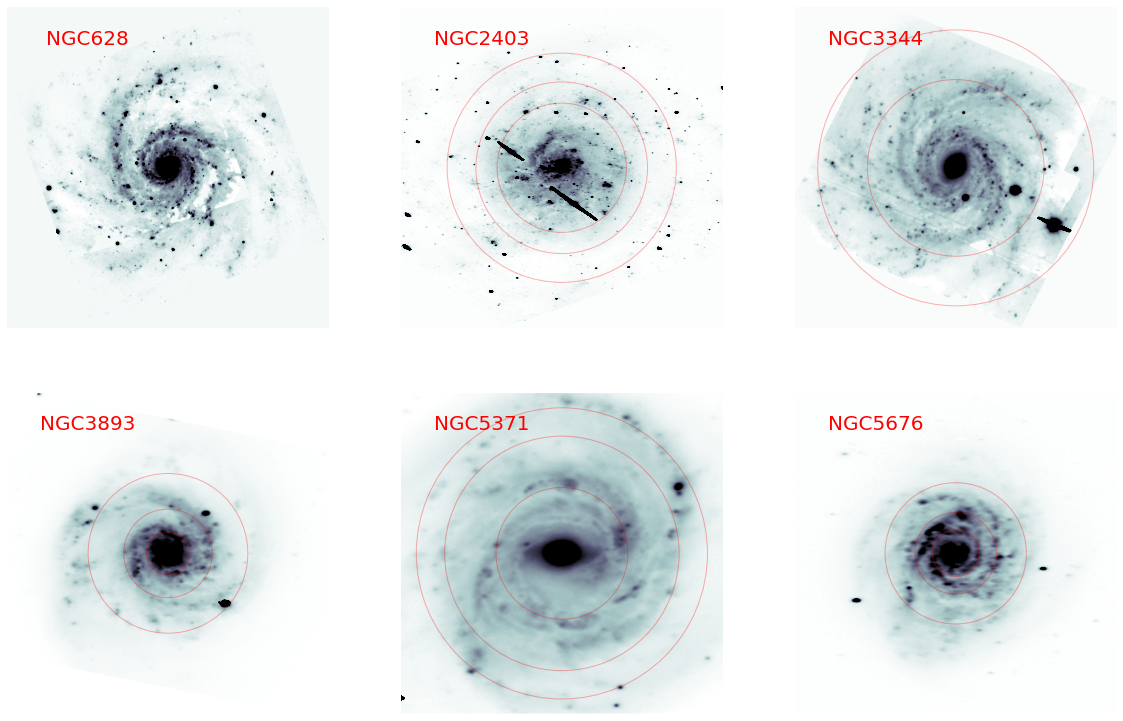

In [47]:
fig, axes = plt.subplots(figsize=[20,13], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name in enumerate(coords.keys()):
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data

    xl,yl = img_data_raw.shape
    x0,y0 = int(xl/2), int(yl/2)
    size = min(x0,y0)
    img_data_raw = img_data_raw[x0-size:x0+size, y0-size:y0+size]
    
    ax = axes[ind]
    lims = PercentileInterval(98.5).get_limits(img_data_raw)
    ax.imshow(img_data_raw, vmin=lims[0], vmax=lims[1], cmap=cm.bone_r)
    
    ax.text(0.25, 0.9, name,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=20,
           color='r')
    ax.axis('off')
    
    xl,yl = img_data_raw.shape
    x0,y0 = int(xl/2), int(yl/2)
    for cr in rings[name]:
        circle2 = plt.Circle((x0, y0), cr/0.262, color='r', fill=False, alpha=0.3)
        ax.add_patch(circle2)

plt.savefig('dataplot2.png', bbox_inches='tight')
plt.show()

In [48]:
pts = [[],[]]
with open('/mnt/sdb2/science/spirals/crs_coupling/fits/NGC628_dr8_g_deproject.reg') as inpreg:
    lines = inpreg.readlines()[3:]
    for ll in lines:
        fl = ll.replace('point(', '').replace(') # point=cross', '').split(',')
        pts[0].append(float(fl[0]))
        pts[1].append(float(fl[1]))
    
pts = np.array(pts)

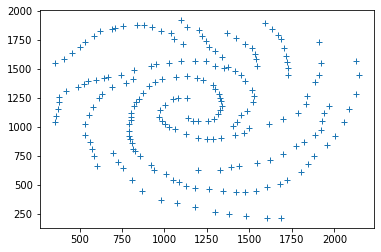

In [49]:
plt.plot(pts[0,:], pts[1,:], '+')

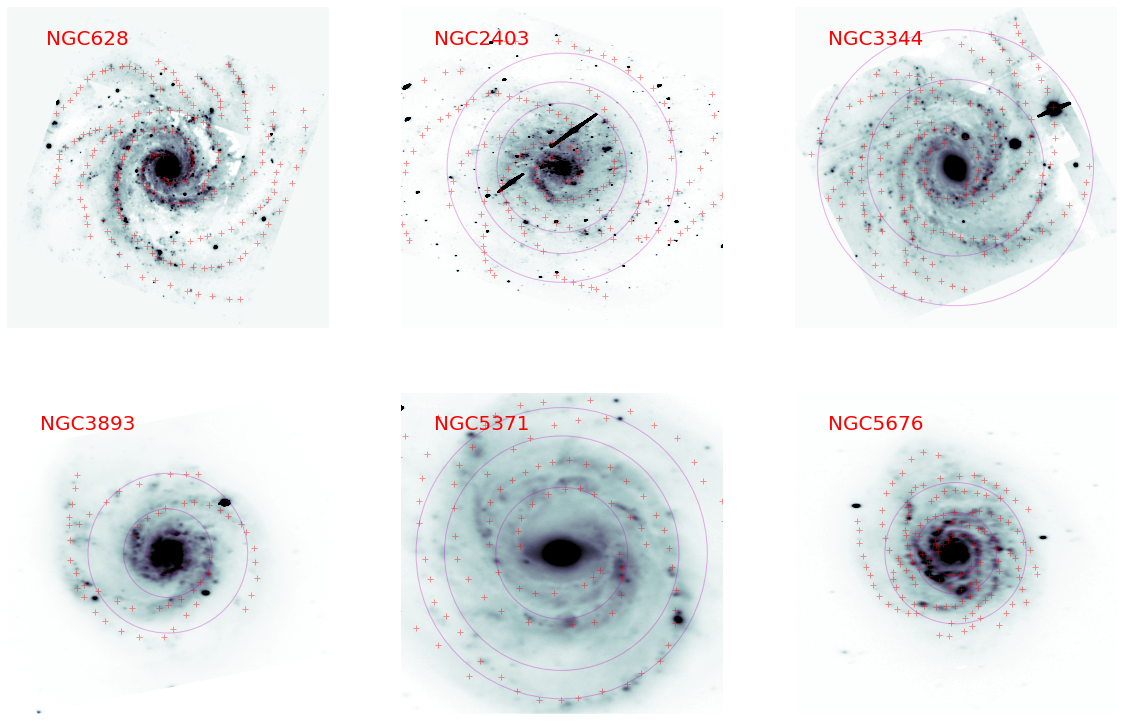

In [50]:
fig, axes = plt.subplots(figsize=[20,13], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name in enumerate(coords.keys()):
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data
    
    
    
    pts = [[],[]]
    with open(f'./fits/{name}_dr8_g_deproject.reg') as inpreg:
        lines = inpreg.readlines()[3:]
        for ll in lines:
            fl = ll.replace('point(', '').replace(') # point=cross', '').replace(') # point=x', '').split(',')
            pts[0].append(float(fl[0]))
            pts[1].append(float(fl[1]))

    pts = np.array(pts)
    
    xl,yl = img_data_raw.shape
    x0,y0 = int(xl/2), int(yl/2)
    size = min(x0,y0)
    img_data_raw_ = img_data_raw[x0-size:x0+size, y0-size:y0+size]
    
    ax = axes[ind]
    lims = PercentileInterval(98.5).get_limits(img_data_raw_)
    ax.imshow(img_data_raw, vmin=lims[0], vmax=lims[1], cmap=cm.bone_r)
    
    ax.plot(pts[0,:], pts[1,:], '+', color='r', alpha=0.4)
    
    ax.text(0.25, 0.9, name,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=20,
           color='r')
    ax.axis('off')
    
    xl,yl = img_data_raw.shape
    y0,x0 = int(xl/2), int(yl/2)
    for cr in rings[name]:
        circle2 = plt.Circle((x0, y0), cr/0.262, color='m', fill=False, alpha=0.3)
        ax.add_patch(circle2)
        
    ax.set_ylim(y0-size,y0+size)
    ax.set_xlim(x0-size,x0+size)
    
#     ax.scatter(x0,y0,100)
    
plt.savefig('dataplot3.png', bbox_inches='tight')
plt.show()

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:239: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWa

ke: NGC 2403
[(205, 235), (287, 297), (380, 400)]
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
ke: NGC 2403
[(205, 235), (287, 297), (380, 400)]
ke: NGC 3344
[(72, 81), (111, 128)]
++++++
'list' object has no attribute 'xy'
ke: NGC 3893
[(15, 20), (33, 39), (60, 70)]
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
ke: NGC 5676
[(20, 23), (34, 41), (60, 70)]
++++++
'list' object has no attribute 'xy'
ke: NGC0628
[(80, 100), (130, 160)]
++++++
'list' object has no attribute 'xy'


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:239: RuntimeWarning: invalid value encountered in subtract


ke: NGC 5371
[(37, 49), (70, 83), (93, 97)]


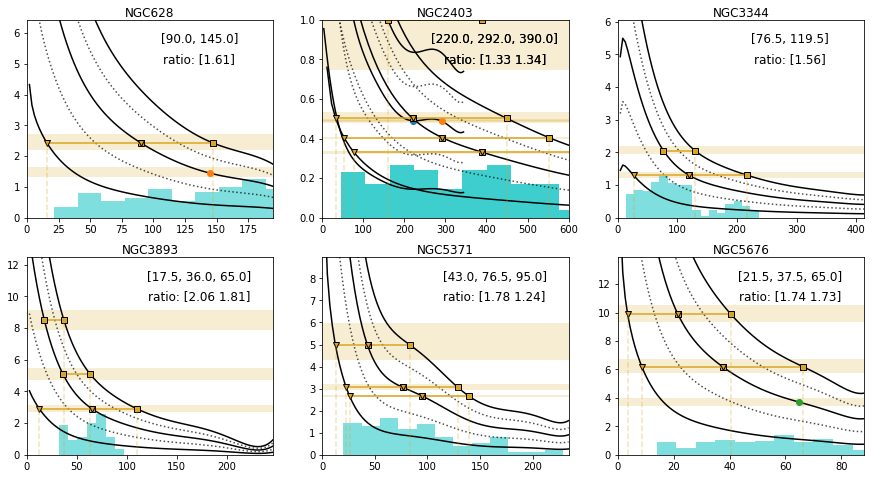

In [95]:
# d_path = './vel_curves/data/'
d_path = '/mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/'
ffnames = os.listdir(d_path)

vel_data = {}

fig, axes = plt.subplots(figsize=[15,8], ncols=3, nrows=2)
axes=axes.flatten()
ax_by_name = {'NGC628': axes[0],
 'NGC2403': axes[1],
 'NGC3344': axes[2],
 'NGC3893': axes[3],
 'NGC5371': axes[4],
 'NGC5676': axes[5]}


rings = {}

for fname in ffnames[2:]:
# for fname in ['NGC5676_WHISP_arcsec.data']:
    if '.png' in fname:
        continue
        
    if fname == 'Be87_NGC5371_kpc.data':
        continue
    
#     print('='*50)
#     print(fname)
    data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=',')
    if type(data[0])==np.float64:
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=' ')
    
    
   
    tmps = fname.replace('.data', '').replace('.dat', '').split('_')
    if len(tmps) == 2:
        name, units = tmps
        name2 = ''
    elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
        name, name2, units = tmps
    else:
        name2, name, units = tmps
    
    if name not in list(coords.keys()) and name2 not in coords.keys():
        continue
        
#     print(name, name2, units)
    if name  == 'NGC2403' and name2 != 'THINGS':
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter='  ')
    
    if units == 'kpc':
        data[:,0] = data[:,0]/scales[name]
        units = 'arcsec'
    
    if units == 'arcmin':
        data[:,0] = data[:,0]*60.
        units = 'arcsec'
    
    
    #correct systemic velocity in several cases, ssee Appendix
    if name == 'UGC6263':
        data[:,1] = data[:,1]+58.
    if name == 'UGC6778':
        data[:,1] = data[:,1]+14.
    if name == 'UGC5557':
        data[:,1] = data[:,1]+13.
    if name == 'NGC0753':
        data[:,1] = data[:,1]+35.
    if name == 'NGC5676':
        data[:,1] = data[:,1]+40.
        tmp = '''0.8011099915759701, 59.92633091623861
                3.06734279248775, 140.62370955220433
                6.303166449183209, 147.6107100972896
                8.481855271634089, 167.24616375679295
                11.015675327464066, 184.58565269817154
                12.472539270907333, 200.74825324986375
                15.359838786937758, 214.63966568110868
                17.15201268561802, 214.6809600105713
                17.867230471911597, 213.5453659503478
                19.30096959085577, 213.57840141391785
                20.372970383706928, 211.298954427578
                22.520275515766173, 209.04428403891575
                23.955666407888856, 210.2294312944947
                26.11453395219769, 216.03954344989347
                28.996878148692616, 226.47462050511228
                31.152442146644404, 229.98050907649372
                34.01661683817579, 227.7423564196165
                35.452007730298504, 228.92750367519534
                37.9676582811648, 233.593762904478
                39.04131084719444, 232.46642771014683
                42.2721791843544, 235.99709287920587
                45.84661634264384, 229.1670107860789
                47.64704910721659, 234.9688640755851
                49.800961331989896, 237.32264085495774
                52.67174311623526, 239.69293536611553
                54.82400356783006, 240.89460035347952
                58.41330668472605, 244.433524388431
                60.917394823342846, 241.03500107365267
                64.49678730116779, 237.6612543565517
                65.2136568606399, 237.67777208833684
                67.00748253249861, 238.87117820980814
                70.95522042913063, 242.4183611106523
                72.38235245536083, 237.84294940618759
                74.52470226788455, 232.13194364149922
                77.3822698667019, 225.2853438165871
                80.60653111114777, 224.20756181761112
                82.39540146347105, 221.94463256305653
                83.8258370360582, 219.67344444260914
                85.61470738838142, 217.41051518805443
                88.1303579392478, 222.0767744173371'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
#         data = np.concatenate([data, np.array(tmp)])
        data = np.array(tmp) #we use Halpha rot map instead - this is correct, see Appendix notes (Valeria not get it perfectly accurate)
        
        
    if name == 'NGC7741':
        data[:,1] = data[:,1]+4.
    if name  == 'NGC628':
        tmp = '''4.94637079738348, 47.29018716149051
        14.743295929425287, 99.19343270602502
        25.245004376178798, 126.1217810431331
        35.170917518275175, 148.92721983210265
        44.86395743283603, 175.61210470105823
        54.56103172477478, 193.56760551858002
        64.84544412331299, 190.6702781815268
        74.89160412447846, 203.29157565970476
        84.71015800190736, 208.39562337294123
        94.98336379661806, 229.74658506764868
        105.04196312803208, 215.45228172057233
        124.91900427083672, 206.50450897705
        134.3910499579192, 211.3656535523253
        144.90833558399297, 204.58888013528613
        154.9577455002684, 210.1781737942535
        164.77618731165902, 215.52470439780757
        175.17770872019463, 209.23275667885574
        184.8829638329275, 209.48700650319222
        194.70925026699734, 197.85973478451382'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
        data = np.concatenate([data, np.array(tmp)]) 
        
    
    r25  = df[df['name'] == name]['r25'].values[0]
    
#     plt.plot(np.abs(data[:,0])/r25, np.abs(data[:,1]), 'o')
#     plt.ylim(0)
#     plt.title(name)
#     plt.xlabel(f'R, {units}')
    
    
    vel = np.abs(data[:,1])
    rad = np.abs(data[:,0])
    
    vel = np.concatenate([[0.0], vel])
    rad = np.concatenate([[0.0], rad])
    
    points = np.linspace(min(rad), max(rad), 100)
    velocity_approx = np.poly1d(np.polyfit(rad, vel, deg=7))
    
#     line = plt.plot(points/r25, velocity_approx(points), label=name)
    
    dR = (max(rad) - min(rad)) / 20
    kappa = [epic_freq(velocity_approx, r, dR) for r in points]
    
    omega = [v/r for r,v in zip(points, velocity_approx(points))]
    
    ax = ax_by_name[name]
    
    
    ax.plot(points, omega, color='k')
    ax.plot(points, np.array(omega)-np.array(kappa)/2., color='k')
    ax.plot(points, np.array(omega)+np.array(kappa)/2., color='k')
    
    ax.plot(points, np.array(omega)-np.array(kappa)/4., ':', color='k', alpha=0.7)
    ax.plot(points, np.array(omega)+np.array(kappa)/4., ':', color='k', alpha=0.7)
    
    
    yli = -100
    
#     ke = name.replace('NGC', 'NGC ')
#     for ngckey in res[1].keys():
#         if name.replace('UGC', '') in res[1][ngckey]:
#             ke = ngckey
    cccrs = []        
    try:
        ke = reverse_spirals_set[name]
        print('ke:',ke)
#         info = info_by_galaxy[ke]
#         info = get_crs_points(ke)
#         info = df[df['altname']==ke][['cr', 'cr_l', 'cr_r', 'method']].values
        info = consist[ke]
        print(info)
        for info_ in info:
            try:
#                 cr,cr_l,cr_r,clr,method = info_

#                 cr,cr_l,cr_r,method = info_
#                 clr = method_color[method]
        
#                 cr = float(info_['cr'])
#                 method = info_['method']
#                 clr = method_color[method]

                cr_l,cr_r = info_
                cr = (cr_r+cr_l)/2.
                cccrs.append(cr)
                method = 'spirals'
                clr = method_color[method]

                omega_cr = velocity_approx(cr)/cr
                ax.plot([cr], [omega_cr], 'o')
                yli = max(yli, omega_cr+4)
            
#                 print(velocity_approx(cr_r)/cr_r, velocity_approx(cr_l)/cr_l)
            
                ax.axhspan(velocity_approx(cr_r)/cr_r, velocity_approx(cr_l)/cr_l, facecolor=clr, alpha=0.2)

                 
                xx,yy = np.array(omega)+np.array(kappa)/2., points
                indxs = np.isfinite(xx)
                xx,yy = xx[indxs], yy[indxs]

                shapely_line = LineString([[y,x] for x,y in zip(xx, yy)])
                hor_line = LineString([[-100, omega_cr], [1000, omega_cr]])

                intersection_line = shapely_line.intersection(hor_line)
#                 print('intersection_line1 ', intersection_line)
                
                if type(intersection_line) == shapely.geometry.multipoint.MultiPoint:
                    y_new = [(pt.x, pt.y) for pt in intersection_line][1][0]
                else:
                    y_new = intersection_line.xy[0][0]
                
                ax.plot([cr, y_new], [omega_cr, omega_cr], 's-', color=clr, mec='k')
                ax.plot([y_new, y_new], [0, omega_cr], '--', color=clr, alpha=0.3)


                xx,yy = np.array(omega)-np.array(kappa)/2., points
                indxs = np.isfinite(xx)
                xx,yy = xx[indxs], yy[indxs]

                shapely_line = LineString([[y,x] for x,y in zip(xx, yy)])
                hor_line = LineString([[-100, omega_cr], [1000, omega_cr]])

                intersection_line = shapely_line.intersection(hor_line)
#                 print('intersection_line2 ', intersection_line)
                
                if type(intersection_line) == shapely.geometry.multipoint.MultiPoint:
                    y_new_ = [(pt.x, pt.y) for pt in intersection_line][0][0]
                else:
                    y_new_ = intersection_line.xy[0][0]
                
                if y_new_ < cr and y_new_ < y_new:
                    ax.plot([y_new_, cr], [omega_cr, omega_cr], 'v-', color=clr, mec='k')
                    ax.plot([y_new_, y_new_], [0, omega_cr], '--', color=clr, alpha=0.3)
            except Exception as e:
                print('++++++')
                print(e)
                
    except Exception as e:
        print('!!!!!+++')
        print(e)
    
    
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data    
    pts = [[],[]]
    with open(f'./fits/{name}_dr8_g_deproject.reg') as inpreg:
        lines = inpreg.readlines()[3:]
        for ll in lines:
            fl = ll.replace('point(', '').replace(') # point=cross', '').replace(') # point=x', '').split(',')
            pts[0].append(float(fl[0]))
            pts[1].append(float(fl[1]))

    pts = np.array(pts)
    
    xl,yl = img_data_raw.shape
    x0,y0 = int(xl/2), int(yl/2)
    size = min(x0,y0)
    
    rara = 0.262*np.sqrt(np.power(pts[0,:]-y0, 2) + np.power(pts[1,:]-x0, 2))
    mult = 10
    if name == 'NGC2403':
        mult=2
    weights = mult*np.ones_like(rara)/float(len(rara))
    ax.hist(rara, color='c', alpha=0.5, weights=weights, bins=int(sqrt(len(rara))))
#     ax.hist(rara, color='c', alpha=0.5)
#     for item in p:
#         item.set_height(item.get_height()/sum(x))
        
    text = f'{cccrs}'
    rings[name] = cccrs
    
    ax.text(0.7, 0.9, text,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=12,
           color='k')
    
    ptmp = np.array(cccrs[1:])/np.array(cccrs[:-1])
    text = f'ratio: {np.array2string(ptmp, precision=2)}'
    
    ax.text(0.7, 0.8, text,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=12,
           color='k')
    
#     ax.set_ylabel(f'Omega, km/s/{units}', fontsize = 18)
#     ax.set_xlabel(f'Distance, {units}', fontsize = 18)
    ax.set_xlim(0, max(rad))
#     print(yli, np.max(np.array(omega)+np.array(kappa)/2.))
    if yli < 0:
        tmp = np.array(np.array(omega)+np.array(kappa)/2.)
        tmp = tmp[np.isfinite(tmp)]
        ax.set_ylim(0, np.max(tmp))
    else:
        tmp = np.array(omega)
        tmp_max = np.max(tmp[np.isfinite(tmp)])
        ax.set_ylim(0, min(yli, tmp_max+3))
    ax.set_title(name, pad=-40)
    if name == 'NGC2403':
        ax.set_xlim(0, 600)
        ax.set_ylim(0, 1)
# plt.xlabel('R/R25')
# plt.ylabel('V, km/s')
# plt.ylim(75,265)
# plt.xlim(0,2.05)
# plt.legend(fontsize=22, ncol=2)
# plt.yscale('log')

plt.savefig('omegas2.png', bbox_inches='tight')
plt.show()

## rot curves

In [52]:
from scipy.optimize import curve_fit
def simple_velocity_approx(x, a, b, c):
            return a * x**2/(b**2+x**2)+c
    

NGC2403 SPARC arcsec
NGC2403 THINGS arcsec
NGC3344  kpc
NGC3893 SV89 kpc
NGC5676 WHISP arcsec
NGC628 Ts kpc
NGC5371 Sa96 kpc


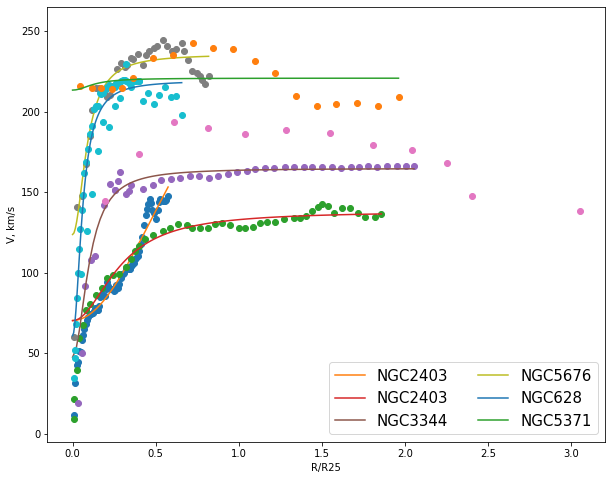

In [53]:
# d_path = './vel_curves/data/'
d_path = '/mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/'
ffnames = os.listdir(d_path)

vel_data = {}

fig = plt.figure(figsize=[10,8])
ax = plt.gca()

for fname in ffnames[2:]:
# for fname in ['NGC5676_WHISP_arcsec.data']:
    if '.png' in fname:
        continue
        
    if fname == 'Be87_NGC5371_kpc.data':
        continue
    
#     print('='*50)
#     print(fname)
    data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=',')
    if type(data[0])==np.float64:
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=' ')
    
    
   
    tmps = fname.replace('.data', '').replace('.dat', '').split('_')
    if len(tmps) == 2:
        name, units = tmps
        name2 = ''
    elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
        name, name2, units = tmps
    else:
        name2, name, units = tmps
    
    if name not in list(coords.keys()) and name2 not in coords.keys():
        continue
        
    print(name, name2, units)
    if name  == 'NGC2403' and name2 != 'THINGS':
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter='  ')
    
    if units == 'kpc':
        data[:,0] = data[:,0]/scales[name]
        units = 'arcsec'
    
    if units == 'arcmin':
        data[:,0] = data[:,0]*60.
        units = 'arcsec'
    
    
    #correct systemic velocity in several cases, ssee Appendix
    if name == 'UGC6263':
        data[:,1] = data[:,1]+58.
    if name == 'UGC6778':
        data[:,1] = data[:,1]+14.
    if name == 'UGC5557':
        data[:,1] = data[:,1]+13.
    if name == 'NGC0753':
        data[:,1] = data[:,1]+35.
    if name == 'NGC5676':
        data[:,1] = data[:,1]+40.
        tmp = '''0.8011099915759701, 59.92633091623861
                3.06734279248775, 140.62370955220433
                6.303166449183209, 147.6107100972896
                8.481855271634089, 167.24616375679295
                11.015675327464066, 184.58565269817154
                12.472539270907333, 200.74825324986375
                15.359838786937758, 214.63966568110868
                17.15201268561802, 214.6809600105713
                17.867230471911597, 213.5453659503478
                19.30096959085577, 213.57840141391785
                20.372970383706928, 211.298954427578
                22.520275515766173, 209.04428403891575
                23.955666407888856, 210.2294312944947
                26.11453395219769, 216.03954344989347
                28.996878148692616, 226.47462050511228
                31.152442146644404, 229.98050907649372
                34.01661683817579, 227.7423564196165
                35.452007730298504, 228.92750367519534
                37.9676582811648, 233.593762904478
                39.04131084719444, 232.46642771014683
                42.2721791843544, 235.99709287920587
                45.84661634264384, 229.1670107860789
                47.64704910721659, 234.9688640755851
                49.800961331989896, 237.32264085495774
                52.67174311623526, 239.69293536611553
                54.82400356783006, 240.89460035347952
                58.41330668472605, 244.433524388431
                60.917394823342846, 241.03500107365267
                64.49678730116779, 237.6612543565517
                65.2136568606399, 237.67777208833684
                67.00748253249861, 238.87117820980814
                70.95522042913063, 242.4183611106523
                72.38235245536083, 237.84294940618759
                74.52470226788455, 232.13194364149922
                77.3822698667019, 225.2853438165871
                80.60653111114777, 224.20756181761112
                82.39540146347105, 221.94463256305653
                83.8258370360582, 219.67344444260914
                85.61470738838142, 217.41051518805443
                88.1303579392478, 222.0767744173371'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
#         data = np.concatenate([data, np.array(tmp)])
        data = np.array(tmp) #we use Halpha rot map instead - this is correct, see Appendix notes (Valeria not get it perfectly accurate)
        
        
    if name == 'NGC7741':
        data[:,1] = data[:,1]+4.
    if name  == 'NGC628':
        tmp = '''4.94637079738348, 47.29018716149051
        14.743295929425287, 99.19343270602502
        25.245004376178798, 126.1217810431331
        35.170917518275175, 148.92721983210265
        44.86395743283603, 175.61210470105823
        54.56103172477478, 193.56760551858002
        64.84544412331299, 190.6702781815268
        74.89160412447846, 203.29157565970476
        84.71015800190736, 208.39562337294123
        94.98336379661806, 229.74658506764868
        105.04196312803208, 215.45228172057233
        124.91900427083672, 206.50450897705
        134.3910499579192, 211.3656535523253
        144.90833558399297, 204.58888013528613
        154.9577455002684, 210.1781737942535
        164.77618731165902, 215.52470439780757
        175.17770872019463, 209.23275667885574
        184.8829638329275, 209.48700650319222
        194.70925026699734, 197.85973478451382'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
        data = np.concatenate([data, np.array(tmp)]) 
        
    
    r25  = df[df['name'] == name]['r25'].values[0]
    
    plt.plot(np.abs(data[:,0])/r25, np.abs(data[:,1]), 'o')
    plt.ylim(0)
#     plt.title(name)
#     plt.xlabel(f'R, {units}')
    
    
    vel = np.abs(data[:,1])
    rad = np.abs(data[:,0])
    
    vel = np.concatenate([[0.0], vel])
    rad = np.concatenate([[0.0], rad])
    
    points = np.linspace(min(rad), max(rad), 100)
#     velocity_approx = np.poly1d(np.polyfit(rad, vel, deg=7))
    mask = vel>65
    try:
        param, param_cov = curve_fit(simple_velocity_approx, rad[mask], vel[mask])
        plt.plot(points/r25, simple_velocity_approx(points, param[0], param[1], param[2]), label=name)
    except:
        pass
    
#     dR = (max(rad) - min(rad)) / 20
#     kappa = [epic_freq(velocity_approx, r, dR) for r in points]
    
#     omega = [v/r for r,v in zip(points, velocity_approx(points))]
 
    
plt.xlabel('R/R25')
plt.ylabel('V, km/s')
plt.ylim(-5,265)
# plt.xlim(0,2.05)
plt.legend(fontsize=15, ncol=2)
# plt.yscale('log')

# plt.savefig('rotvels.png', bbox_inches='tight')
plt.show()

In [54]:
import numpy as np
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs.utils import pixel_to_skycoord, skycoord_to_pixel
import pylab as plt
import pandas as pd
from astroquery.ned import Ned
import astropy.units as u
import warnings
import math
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import scipy.interpolate as interpolate

NGC5371 Be87 kpc
NGC2403 SPARC arcsec
NGC2403 THINGS arcsec
NGC3344  kpc
NGC3893 SV89 kpc
NGC5676 WHISP arcsec
NGC628 Ts kpc
NGC5371 Sa96 kpc


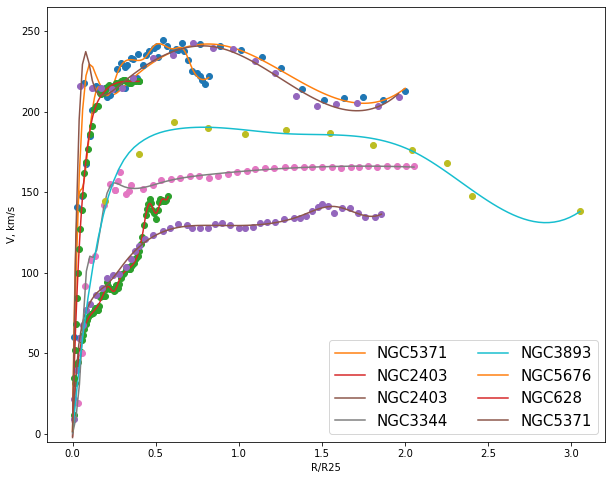

In [55]:
# d_path = './vel_curves/data/'
d_path = '/mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/'
ffnames = os.listdir(d_path)

vel_data = {}

fig = plt.figure(figsize=[10,8])
ax = plt.gca()

for fname in ffnames[2:]:
# for fname in ['NGC5676_WHISP_arcsec.data']:
    if '.png' in fname:
        continue
        

#     print('='*50)
#     print(fname)
    data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=',')
    if type(data[0])==np.float64:
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=' ')
    
    
   
    tmps = fname.replace('.data', '').replace('.dat', '').split('_')
    if len(tmps) == 2:
        name, units = tmps
        name2 = ''
    elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
        name, name2, units = tmps
    else:
        name2, name, units = tmps
    
    if name not in list(coords.keys()) and name2 not in coords.keys():
        continue
        
    print(name, name2, units)
    if name  == 'NGC2403' and name2 != 'THINGS':
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter='  ')
    
    if units == 'kpc':
        data[:,0] = data[:,0]/scales[name]
        units = 'arcsec'
    
    if units == 'arcmin':
        data[:,0] = data[:,0]*60.
        units = 'arcsec'
        
    if name == 'NGC5676':
        data[:,1] = data[:,1]+40.
        tmp = '''0.8011099915759701, 59.92633091623861
                3.06734279248775, 140.62370955220433
                6.303166449183209, 147.6107100972896
                8.481855271634089, 167.24616375679295
                11.015675327464066, 184.58565269817154
                12.472539270907333, 200.74825324986375
                15.359838786937758, 214.63966568110868
                17.15201268561802, 214.6809600105713
                17.867230471911597, 213.5453659503478
                19.30096959085577, 213.57840141391785
                20.372970383706928, 211.298954427578
                22.520275515766173, 209.04428403891575
                23.955666407888856, 210.2294312944947
                26.11453395219769, 216.03954344989347
                28.996878148692616, 226.47462050511228
                31.152442146644404, 229.98050907649372
                34.01661683817579, 227.7423564196165
                35.452007730298504, 228.92750367519534
                37.9676582811648, 233.593762904478
                39.04131084719444, 232.46642771014683
                42.2721791843544, 235.99709287920587
                45.84661634264384, 229.1670107860789
                47.64704910721659, 234.9688640755851
                49.800961331989896, 237.32264085495774
                52.67174311623526, 239.69293536611553
                54.82400356783006, 240.89460035347952
                58.41330668472605, 244.433524388431
                60.917394823342846, 241.03500107365267
                64.49678730116779, 237.6612543565517
                65.2136568606399, 237.67777208833684
                67.00748253249861, 238.87117820980814
                70.95522042913063, 242.4183611106523
                72.38235245536083, 237.84294940618759
                74.52470226788455, 232.13194364149922
                77.3822698667019, 225.2853438165871
                80.60653111114777, 224.20756181761112
                82.39540146347105, 221.94463256305653
                83.8258370360582, 219.67344444260914
                85.61470738838142, 217.41051518805443
                88.1303579392478, 222.0767744173371'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
#         data = np.concatenate([data, np.array(tmp)])
        data = np.array(tmp) #we use Halpha rot map instead - this is correct, see Appendix notes (Valeria not get it perfectly accurate)
   
    r25  = df[df['name'] == name]['r25'].values[0]
    
    plt.plot(np.abs(data[:,0])/r25, np.abs(data[:,1]), 'o')
    plt.ylim(0)
#     plt.title(name)
#     plt.xlabel(f'R, {units}')
    
    
    vel = np.abs(data[:,1])
    rad = np.abs(data[:,0])
    
    vel = np.concatenate([[0.0], vel])
    rad = np.concatenate([[0.0], rad])
    
    points = np.linspace(min(rad), max(rad), 100)
#     velocity_approx = np.poly1d(np.polyfit(rad, vel, deg=7))
#     mask = vel>65
#     try:
    soft_par = 170
    t, c, k = interpolate.splrep(rad,vel, s=soft_par, k=3)
    spline = interpolate.BSpline(t, c, k, extrapolate=True)
    plt.plot(points/r25, spline(points), label=name)
#     except:
#         pass
    
#     dR = (max(rad) - min(rad)) / 20
#     kappa = [epic_freq(velocity_approx, r, dR) for r in points]
    
#     omega = [v/r for r,v in zip(points, velocity_approx(points))]
 
    
plt.xlabel('R/R25')
plt.ylabel('V, km/s')
plt.ylim(-5,265)
# plt.xlim(0,2.05)
plt.legend(fontsize=15, ncol=2)
# plt.yscale('log')

# plt.savefig('rotvels.png', bbox_inches='tight')
plt.show()

In [56]:
import pathlib

In [57]:
alldatrot = []


p = pathlib.Path('/mnt/sdb2/science/spirals/CRs/data/rot_curves_correrted/')
for fname in p.glob('**/*'):
    if '.dat' not in str(fname) and '.data' not in str(fname):
        continue
#     print(fname)
    alldatrot.append(str(fname))
    
p = pathlib.Path('/mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/')
for fname in p.glob('**/*'):
    if '.dat' not in str(fname) and '.data' not in str(fname):
        continue
#     print(fname)
    alldatrot.append(str(fname))

In [58]:
len(alldatrot)

1084

In [59]:
rotdict = {}

for name in coords.keys():
    rotdict[name] = []
    print('=====')
    altname=df[df['name']==name]['altname'].values[0]
    allvars=set(list(df[df['altname']==altname]['name'].values))
    for namevar in allvars:
        print('>>>>>>', namevar)
        for entry in alldatrot:
            if namevar in entry:
                print('\t', entry)
                rotdict[name].append(entry)

=====
>>>>>> NGC0628
	 /mnt/sdb2/science/spirals/CRs/data/rot_curves_correrted/from_different/NGC0628_Ts_kpc.data
	 /mnt/sdb2/science/spirals/CRs/data/rot_curves_correrted/phangs/NGC0628_PHANGS_kpc.dat
>>>>>> PGC5974
>>>>>> NGC628
	 /mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/NGC628_Ts_kpc.data
=====
>>>>>> NGC2403
	 /mnt/sdb2/science/spirals/CRs/data/rot_curves_correrted/sparc/NGC2403_SPARC.dat
	 /mnt/sdb2/science/spirals/CRs/data/rot_curves_correrted/things/NGC2403_THINGS.dat
	 /mnt/sdb2/science/spirals/CRs/data/rot_curves_correrted/things/NGC2403_THINGS_arcsec.dat
	 /mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/NGC2403_SPARC_arcsec.dat
	 /mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/NGC2403_THINGS_arcsec.dat
=====
>>>>>> NGC3344
	 /mnt/sdb2/science/spirals/CRs/data/rot_curves_correrted/from_different/NGC3344_kpc.data
	 /mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/NGC3344_kpc.data
>>>>>> PGC31968
>>>>>> UGC5840
	 /mnt/sdb

In [60]:
rotdict.keys()

dict_keys(['NGC628', 'NGC2403', 'NGC3344', 'NGC3893', 'NGC5371', 'NGC5676'])

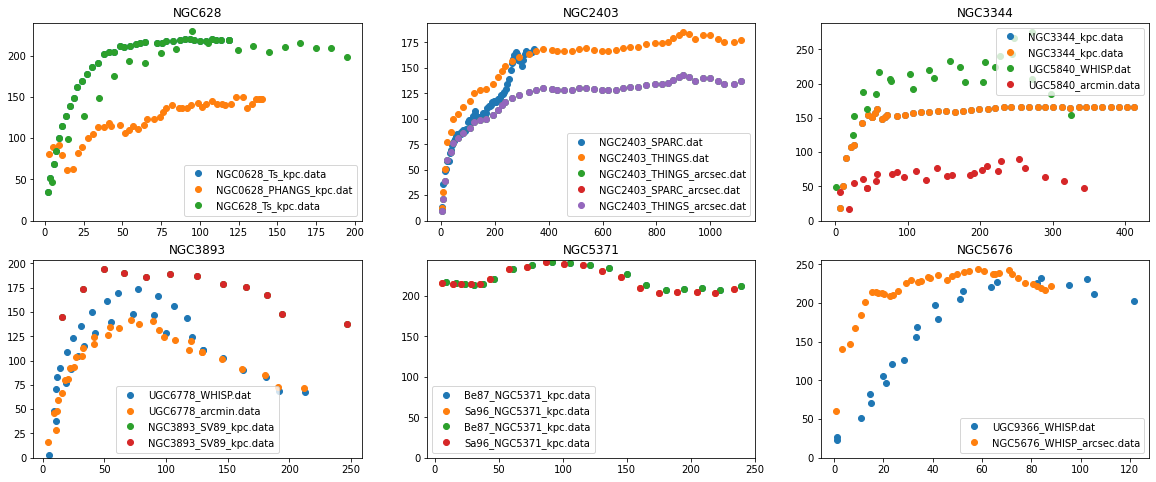

In [61]:
fig, axes = plt.subplots(figsize=[20,8], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name_ in enumerate(rotdict.keys()):
    ax = axes[ind]
#     print('===dsg='*23)
#     print(name_)
#     print('===dsg='*5)
    fnames = rotdict[name_]
    for fname in fnames:
        
#         if 'whisp' in fname or 'WHISP' in fname:
#             continue
        
#         print(fname)
        
        with open(fname, 'r') as inpf:
            text = inpf.read()
            if ',' in text:
#                 print('Option 1')
                data = np.genfromtxt(fname, dtype=np.float, delimiter=',')
            elif ' ' in text:
#                 print('Option 2')
                data = np.genfromtxt(fname, dtype=np.float, delimiter=' ')
            else:
#                 print('Option 3')
                data = np.genfromtxt(fname, dtype=np.float, delimiter='  ')
                
#         try:
#             data = np.genfromtxt(fname, dtype=np.float, delimiter=',')
#         except:
#             try:
#                 data = np.genfromtxt(fname, dtype=np.float, delimiter=' ')
#             except:
#                 data = np.genfromtxt(fname, dtype=np.float, delimiter='  ')

        tmps = fname.split('/')[-1].replace('.data', '').replace('.dat', '').split('_')
#         print(tmps)
        if len(tmps) == 2:
            name, units = tmps
            name2 = ''
        elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
            name, name2, units = tmps
        else:
            name2, name, units = tmps

#         print(name, name2, units)
        
        
        if units == 'kpc':
            data[:,0] = data[:,0]/scales[name_]
            units = 'arcsec'

        if units == 'arcmin':
            data[:,0] = data[:,0]*60.
            units = 'arcsec'
            
        if name == 'UGC6263':
            data[:,1] = data[:,1]+58.
        if name == 'UGC6778':
            data[:,1] = data[:,1]+14.
        if name == 'UGC5557':
            data[:,1] = data[:,1]+13.
        if name == 'NGC0753':
            data[:,1] = data[:,1]+35.
        if name == 'NGC5676':
            data[:,1] = data[:,1]+40.
            tmp = '''0.8011099915759701, 59.92633091623861
                    3.06734279248775, 140.62370955220433
                    6.303166449183209, 147.6107100972896
                    8.481855271634089, 167.24616375679295
                    11.015675327464066, 184.58565269817154
                    12.472539270907333, 200.74825324986375
                    15.359838786937758, 214.63966568110868
                    17.15201268561802, 214.6809600105713
                    17.867230471911597, 213.5453659503478
                    19.30096959085577, 213.57840141391785
                    20.372970383706928, 211.298954427578
                    22.520275515766173, 209.04428403891575
                    23.955666407888856, 210.2294312944947
                    26.11453395219769, 216.03954344989347
                    28.996878148692616, 226.47462050511228
                    31.152442146644404, 229.98050907649372
                    34.01661683817579, 227.7423564196165
                    35.452007730298504, 228.92750367519534
                    37.9676582811648, 233.593762904478
                    39.04131084719444, 232.46642771014683
                    42.2721791843544, 235.99709287920587
                    45.84661634264384, 229.1670107860789
                    47.64704910721659, 234.9688640755851
                    49.800961331989896, 237.32264085495774
                    52.67174311623526, 239.69293536611553
                    54.82400356783006, 240.89460035347952
                    58.41330668472605, 244.433524388431
                    60.917394823342846, 241.03500107365267
                    64.49678730116779, 237.6612543565517
                    65.2136568606399, 237.67777208833684
                    67.00748253249861, 238.87117820980814
                    70.95522042913063, 242.4183611106523
                    72.38235245536083, 237.84294940618759
                    74.52470226788455, 232.13194364149922
                    77.3822698667019, 225.2853438165871
                    80.60653111114777, 224.20756181761112
                    82.39540146347105, 221.94463256305653
                    83.8258370360582, 219.67344444260914
                    85.61470738838142, 217.41051518805443
                    88.1303579392478, 222.0767744173371'''

            tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
    #         data = np.concatenate([data, np.array(tmp)])
            data = np.array(tmp) #we use Halpha rot map instead - this is correct, see Appendix notes (Valeria not get it perfectly accurate)


        if name == 'NGC7741':
            data[:,1] = data[:,1]+4.
        if name  == 'NGC628':
            tmp = '''4.94637079738348, 47.29018716149051
            14.743295929425287, 99.19343270602502
            25.245004376178798, 126.1217810431331
            35.170917518275175, 148.92721983210265
            44.86395743283603, 175.61210470105823
            54.56103172477478, 193.56760551858002
            64.84544412331299, 190.6702781815268
            74.89160412447846, 203.29157565970476
            84.71015800190736, 208.39562337294123
            94.98336379661806, 229.74658506764868
            105.04196312803208, 215.45228172057233
            124.91900427083672, 206.50450897705
            134.3910499579192, 211.3656535523253
            144.90833558399297, 204.58888013528613
            154.9577455002684, 210.1781737942535
            164.77618731165902, 215.52470439780757
            175.17770872019463, 209.23275667885574
            184.8829638329275, 209.48700650319222
            194.70925026699734, 197.85973478451382'''

            tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
            data = np.concatenate([data, np.array(tmp)])

#         r25  = df[df['name'] == name]['r25'].values[0]

        ax.plot(np.abs(data[:,0]), np.abs(data[:,1]), 'o', label=fname.split('/')[-1])
#         plt.ylim(0)
    #     plt.title(name)
    #     plt.xlabel(f'R, {units}')

        
    ax.set_title(name_)
    ax.legend()
    ax.set_ylim(0)
    
# plt.xlabel('R/R25')
# plt.ylabel('V, km/s')
# plt.ylim(-5,265)
# plt.xlim(0,2.05)
# plt.legend(fontsize=15, ncol=2)
# plt.yscale('log')

# plt.savefig('rotvels.png', bbox_inches='tight')
plt.show()

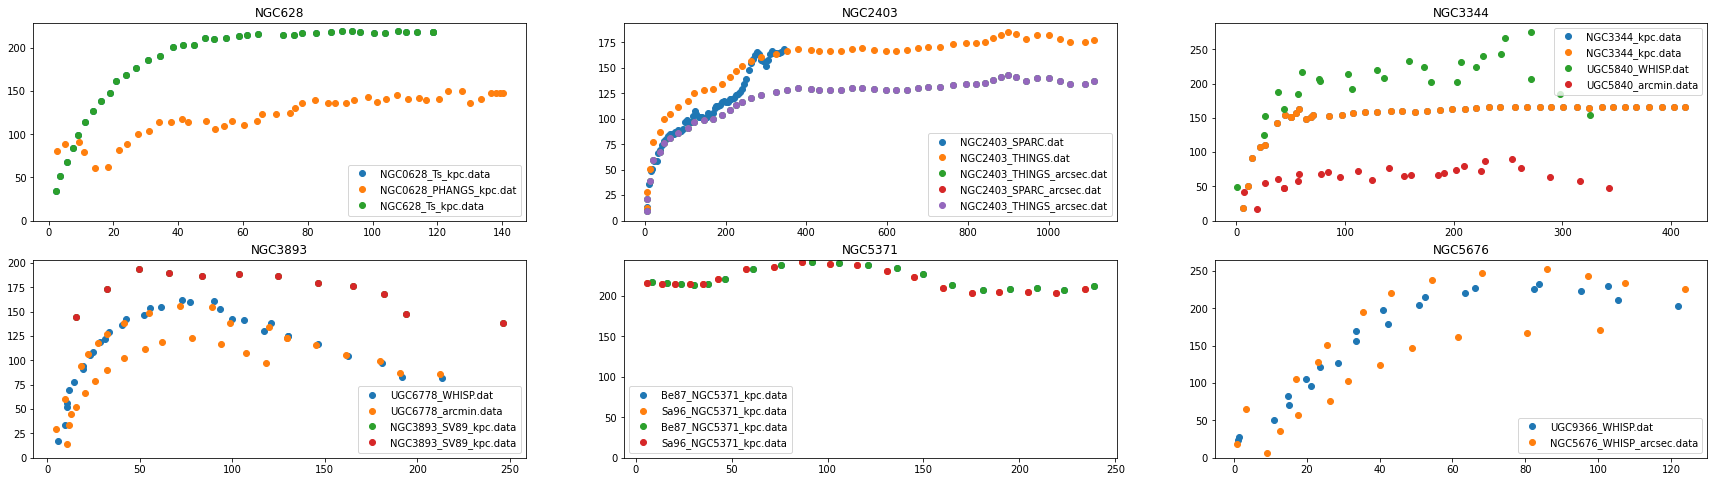

In [62]:
fig, axes = plt.subplots(figsize=[30,8], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name_ in enumerate(rotdict.keys()):
    ax = axes[ind]
#     print('===dsg='*23)
#     print(name_)
#     print('===dsg='*5)
    fnames = rotdict[name_]
    for fname in fnames:
        
#         if 'whisp' in fname or 'WHISP' in fname:
#             continue
        
#         print(fname)
        
        with open(fname, 'r') as inpf:
            text = inpf.read()
            if ',' in text:
#                 print('Option 1')
                data = np.genfromtxt(fname, dtype=np.float, delimiter=',')
            elif ' ' in text:
#                 print('Option 2')
                data = np.genfromtxt(fname, dtype=np.float, delimiter=' ')
            else:
#                 print('Option 3')
                data = np.genfromtxt(fname, dtype=np.float, delimiter='  ')
                
#         try:
#             data = np.genfromtxt(fname, dtype=np.float, delimiter=',')
#         except:
#             try:
#                 data = np.genfromtxt(fname, dtype=np.float, delimiter=' ')
#             except:
#                 data = np.genfromtxt(fname, dtype=np.float, delimiter='  ')

        tmps = fname.split('/')[-1].replace('.data', '').replace('.dat', '').split('_')
#         print(tmps)
        if len(tmps) == 2:
            name, units = tmps
            name2 = ''
        elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
            name, name2, units = tmps
        else:
            name2, name, units = tmps

#         print(name, name2, units)
        
        
        if units == 'kpc':
            data[:,0] = data[:,0]/scales[name_]
            units = 'arcsec'

        if units == 'arcmin':
            data[:,0] = data[:,0]*60.
            units = 'arcsec'
            
        

#         r25  = df[df['name'] == name]['r25'].values[0]

        ax.plot(np.abs(data[:,0]), np.abs(data[:,1]), 'o', label=fname.split('/')[-1])
#         if name_ == 'NGC2403':
#             ax.plot(np.abs(data[:,0]), np.abs(data[:,1])*sqrt(3)/2, 'x')
#         plt.ylim(0)
    #     plt.title(name)
    #     plt.xlabel(f'R, {units}')

        
    ax.set_title(name_)
    ax.legend()
    ax.set_ylim(0)
    
# plt.xlabel('R/R25')
# plt.ylabel('V, km/s')
# plt.ylim(-5,265)
# plt.xlim(0,2.05)
# plt.legend(fontsize=15, ncol=2)
# plt.yscale('log')

# plt.savefig('rotvels.png', bbox_inches='tight')
plt.show()

##  build cr table

In [63]:
df = pd.read_csv('./total_crs.csv')

In [64]:
df.head()

Unnamed: 0    name method    bar kind       bands link paper_name     cr  \
0           0  NGC428    F-B  False  ISM  Halpha, HI  NaN  F-B works    5.8   
1           1  NGC428    F-B  False  ISM  Halpha, HI  NaN  F-B works   17.6   
2           2  NGC428    F-B  False  ISM  Halpha, HI  NaN  F-B works   59.5   
3           3  NGC428    F-B  False  ISM  Halpha, HI  NaN  F-B works  115.6   
4           4  NGC428    F-B  False  ISM  Halpha, HI  NaN  F-B works  144.7   

   err_cr_l  err_cr_r   cr_l   cr_r  err_range   altname        r25  
0       2.2       2.2    3.6    8.0        4.4  NGC 0428  84.551488  
1       3.1       3.1   14.5   20.7        6.2  NGC 0428  84.551488  
2       3.9       3.9   55.6   63.4        7.8  NGC 0428  84.551488  
3       2.2       2.2  113.4  117.8        4.4  NGC 0428  84.551488  
4       2.2       2.2  142.5  146.9        4.4  NGC 0428  84.551488

In [65]:
df.columns

Index(['Unnamed: 0', 'name', 'method', 'bar', 'kind', 'bands', 'link',
       'paper_name', 'cr', 'err_cr_l', 'err_cr_r', 'cr_l', 'cr_r', 'err_range',
       'altname', 'r25'],
      dtype='object')

In [66]:
for name in coords.keys():
    print('='*40)
    print(name)
    altname=df[df['name']==name]['altname'].values[0]
    print(df[df['altname']==altname][['name', 'method', 'kind', 'bands', 'paper_name', 'cr', 'err_cr_l', 'err_cr_r', 'altname']])

NGC628
         name       method     kind            bands  \
486    NGC628       offset     both         HI, 24mu   
1092  PGC5974        morph  stellar          optical   
1189   NGC628        morph  stellar               B?   
1216  NGC0628  metallicity  stellar      12+log(O/H)   
1238  NGC0628          T-W      ISM        CO,Halpha   
1239  NGC0628          T-W      ISM        CO,Halpha   
1348  NGC0628          T-W  stellar             MUSE   
1533  NGC0628       offset  stellar  B,Spitzer,GALEX   
1534  NGC0628       offset  stellar  B,Spitzer,GALEX   
1637  PGC5974      spirals  stellar            g,r,i   
1668  NGC 628       offset      NaN            H II    
1684  NGC 628          P-D      NaN             H II   
1714   NGC628       offset  stellar              HII   
1715   NGC628       offset  stellar              HII   
1716   NGC628       offset  stellar              HII   
1721   NGC628         mode      ISM               HI   
1722   NGC628         mode      ISM      

In [67]:
for name in coords.keys():
    altname=df[df['name']==name]['altname'].values[0]
    ddf=df[df['altname']==altname][['method', 'kind', 'bands', 'paper_name', 'cr', 'err_cr_l', 'err_cr_r']]
    ddf = ddf.sort_values('cr')
    print('\\hline')
    ii = 0
    for ind, row in ddf.iterrows():
        if ii != 0:
            name = '--///--'
        method, kind, bands, paper_name, cr, err_cr_l, err_cr_r = row.values
        if err_cr_l == err_cr_r:
            cr_str = f'${cr:.1f}\pm{err_cr_l:.1f}$'
        else:
            cr_str = f'${cr:.1f}_{{-{err_cr_l:.1f}}}^{{+{err_cr_r:.1f}}}$'
        paper_name = paper_name.replace("&", "\&")
        tbl_row = f'{name} & {cr_str} & {method} & {bands} & {kind} & {paper_name} \\\\'
        print(tbl_row)
        ii+=1

\hline
NGC628 & $68.0\pm0.0$ & P-D & H II & nan & Puerari \& Dottori (1992) \\
--///-- & $80.2\pm25.3$ & T-W & CO,Halpha & ISM & Williams et al. (2021) \\
--///-- & $85.9\pm28.6$ & offset & HII & stellar & Sakhibov et al. \\
--///-- & $85.9\pm28.6$ & mode & HI & ISM & Sakhibov et al. \\
--///-- & $88.8\pm4.2$ & morph & optical & stellar & Elmegreen \& Elmegreen (1995) \\
--///-- & $91.3\pm20.6$ & T-W & CO,Halpha & ISM & Williams et al. (2021) \\
--///-- & $94.5\pm42.8$ & T-W & MUSE & stellar & Williams et al. (2021) \\
--///-- & $137.0\pm20.9$ & offset & B,Spitzer,GALEX & stellar & Abdeen et al. (2020) \\
--///-- & $138.5\pm20.9$ & offset & B,Spitzer,GALEX & stellar & Abdeen et al. (2020) \\
--///-- & $141.0\pm0.0$ & offset & H II  & nan & Cepa \& Beckman (1990) \\
--///-- & $141.3\pm0.0$ & morph & B? & stellar & Elmegreen et al. (1992) \\
--///-- & $145.2\pm40.4$ & offset & HI, 24mu & both & Tamburro \\
--///-- & $147.8\pm55.4$ & metallicity & 12+log(O/H) & stellar & Scarano \& Lepine

/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:239: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWa

ke: NGC 2403
[(205, 235), (287, 297), (380, 400)]
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
ke: NGC 2403
[(205, 235), (287, 297), (380, 400)]
ke: NGC 3344
[(72, 81), (111, 128)]
++++++
'list' object has no attribute 'xy'
ke: NGC 3893
[(15, 20), (33, 39), (60, 70)]
++++++
'list' object has no attribute 'xy'
++++++
'list' object has no attribute 'xy'
ke: NGC 5676
[(20, 23), (34, 41), (60, 70)]
++++++
'list' object has no attribute 'xy'


/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:172: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in subtract
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in double_scalars
/mnt/sdb2/upwork/anton/catalyst-venv/lib/python3.6/site-packages/ipykernel_launcher.py:172: Ru

ke: NGC0628
!!!!!+++
'NGC0628'
ke: NGC 5371
[(37, 49), (70, 83), (93, 97)]


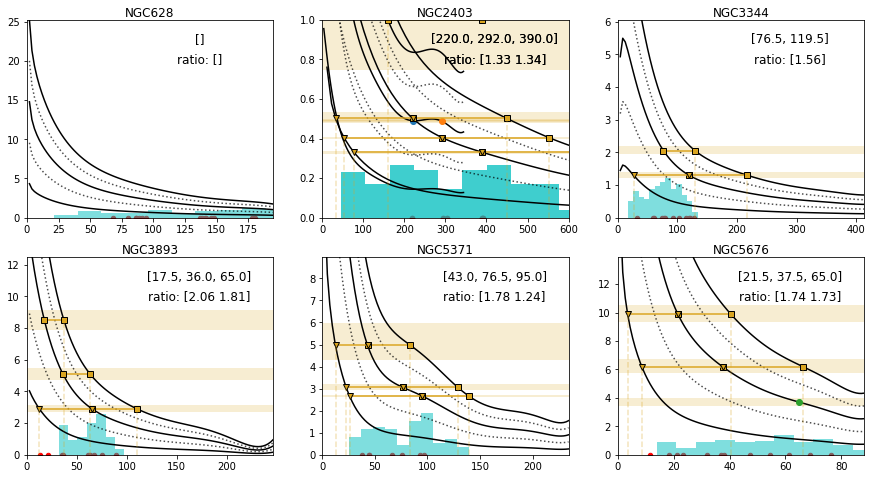

In [68]:
# d_path = './vel_curves/data/'
d_path = '/mnt/sdb2/science/spirals/CR_Olya/vel_curves/comb_vel_curves/'
ffnames = os.listdir(d_path)

vel_data = {}

fig, axes = plt.subplots(figsize=[15,8], ncols=3, nrows=2)
axes=axes.flatten()
ax_by_name = {'NGC628': axes[0],
 'NGC2403': axes[1],
 'NGC3344': axes[2],
 'NGC3893': axes[3],
 'NGC5371': axes[4],
 'NGC5676': axes[5]}


rings = {}

for fname in ffnames[2:]:
# for fname in ['NGC5676_WHISP_arcsec.data']:
    if '.png' in fname:
        continue
        
    if fname == 'Be87_NGC5371_kpc.data':
        continue
    
#     print('='*50)
#     print(fname)
    data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=',')
    if type(data[0])==np.float64:
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter=' ')
    
    
   
    tmps = fname.replace('.data', '').replace('.dat', '').split('_')
    if len(tmps) == 2:
        name, units = tmps
        name2 = ''
    elif tmps[0].startswith('UGC') or tmps[0].startswith('NGC'):
        name, name2, units = tmps
    else:
        name2, name, units = tmps
    
    if name not in list(coords.keys()) and name2 not in coords.keys():
        continue
        
#     print(name, name2, units)
    if name  == 'NGC2403' and name2 != 'THINGS':
        data = np.genfromtxt(d_path + fname, dtype=np.float, delimiter='  ')
    
    if units == 'kpc':
        data[:,0] = data[:,0]/scales[name]
        units = 'arcsec'
    
    if units == 'arcmin':
        data[:,0] = data[:,0]*60.
        units = 'arcsec'
    
    
    #correct systemic velocity in several cases, ssee Appendix
    if name == 'UGC6263':
        data[:,1] = data[:,1]+58.
    if name == 'UGC6778':
        data[:,1] = data[:,1]+14.
    if name == 'UGC5557':
        data[:,1] = data[:,1]+13.
    if name == 'NGC0753':
        data[:,1] = data[:,1]+35.
    if name == 'NGC5676':
        data[:,1] = data[:,1]+40.
        tmp = '''0.8011099915759701, 59.92633091623861
                3.06734279248775, 140.62370955220433
                6.303166449183209, 147.6107100972896
                8.481855271634089, 167.24616375679295
                11.015675327464066, 184.58565269817154
                12.472539270907333, 200.74825324986375
                15.359838786937758, 214.63966568110868
                17.15201268561802, 214.6809600105713
                17.867230471911597, 213.5453659503478
                19.30096959085577, 213.57840141391785
                20.372970383706928, 211.298954427578
                22.520275515766173, 209.04428403891575
                23.955666407888856, 210.2294312944947
                26.11453395219769, 216.03954344989347
                28.996878148692616, 226.47462050511228
                31.152442146644404, 229.98050907649372
                34.01661683817579, 227.7423564196165
                35.452007730298504, 228.92750367519534
                37.9676582811648, 233.593762904478
                39.04131084719444, 232.46642771014683
                42.2721791843544, 235.99709287920587
                45.84661634264384, 229.1670107860789
                47.64704910721659, 234.9688640755851
                49.800961331989896, 237.32264085495774
                52.67174311623526, 239.69293536611553
                54.82400356783006, 240.89460035347952
                58.41330668472605, 244.433524388431
                60.917394823342846, 241.03500107365267
                64.49678730116779, 237.6612543565517
                65.2136568606399, 237.67777208833684
                67.00748253249861, 238.87117820980814
                70.95522042913063, 242.4183611106523
                72.38235245536083, 237.84294940618759
                74.52470226788455, 232.13194364149922
                77.3822698667019, 225.2853438165871
                80.60653111114777, 224.20756181761112
                82.39540146347105, 221.94463256305653
                83.8258370360582, 219.67344444260914
                85.61470738838142, 217.41051518805443
                88.1303579392478, 222.0767744173371'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
#         data = np.concatenate([data, np.array(tmp)])
        data = np.array(tmp) #we use Halpha rot map instead - this is correct, see Appendix notes (Valeria not get it perfectly accurate)
        
        
    if name == 'NGC7741':
        data[:,1] = data[:,1]+4.
    if name  == 'NGC628':
        tmp = '''4.94637079738348, 47.29018716149051
        14.743295929425287, 99.19343270602502
        25.245004376178798, 126.1217810431331
        35.170917518275175, 148.92721983210265
        44.86395743283603, 175.61210470105823
        54.56103172477478, 193.56760551858002
        64.84544412331299, 190.6702781815268
        74.89160412447846, 203.29157565970476
        84.71015800190736, 208.39562337294123
        94.98336379661806, 229.74658506764868
        105.04196312803208, 215.45228172057233
        124.91900427083672, 206.50450897705
        134.3910499579192, 211.3656535523253
        144.90833558399297, 204.58888013528613
        154.9577455002684, 210.1781737942535
        164.77618731165902, 215.52470439780757
        175.17770872019463, 209.23275667885574
        184.8829638329275, 209.48700650319222
        194.70925026699734, 197.85973478451382'''
        
        tmp = [[float(_.split(',')[0]), float(_.split(',')[1])] for _ in tmp.split('\n')]
        data = np.concatenate([data, np.array(tmp)]) 
        
    
    r25  = df[df['name'] == name]['r25'].values[0]
    
#     plt.plot(np.abs(data[:,0])/r25, np.abs(data[:,1]), 'o')
#     plt.ylim(0)
#     plt.title(name)
#     plt.xlabel(f'R, {units}')
    
    
    vel = np.abs(data[:,1])
    rad = np.abs(data[:,0])
    
    vel = np.concatenate([[0.0], vel])
    rad = np.concatenate([[0.0], rad])
    
    points = np.linspace(min(rad), max(rad), 100)
    velocity_approx = np.poly1d(np.polyfit(rad, vel, deg=7))
    
#     line = plt.plot(points/r25, velocity_approx(points), label=name)
    
    dR = (max(rad) - min(rad)) / 20
    kappa = [epic_freq(velocity_approx, r, dR) for r in points]
    
    omega = [v/r for r,v in zip(points, velocity_approx(points))]
    
    ax = ax_by_name[name]
    
    
    ax.plot(points, omega, color='k')
    ax.plot(points, np.array(omega)-np.array(kappa)/2., color='k')
    ax.plot(points, np.array(omega)+np.array(kappa)/2., color='k')
    
    ax.plot(points, np.array(omega)-np.array(kappa)/4., ':', color='k', alpha=0.7)
    ax.plot(points, np.array(omega)+np.array(kappa)/4., ':', color='k', alpha=0.7)
    
    
    yli = -100
    
#     ke = name.replace('NGC', 'NGC ')
#     for ngckey in res[1].keys():
#         if name.replace('UGC', '') in res[1][ngckey]:
#             ke = ngckey
    cccrs = []        
    try:
        ke = reverse_spirals_set[name]
        print('ke:',ke)
#         info = info_by_galaxy[ke]
#         info = get_crs_points(ke)
#         info = df[df['altname']==ke][['cr', 'cr_l', 'cr_r', 'method']].values
        info = consist[ke]
        print(info)
        for info_ in info:
            try:
#                 cr,cr_l,cr_r,clr,method = info_

#                 cr,cr_l,cr_r,method = info_
#                 clr = method_color[method]
        
#                 cr = float(info_['cr'])
#                 method = info_['method']
#                 clr = method_color[method]

                cr_l,cr_r = info_
                cr = (cr_r+cr_l)/2.
                cccrs.append(cr)
                method = 'spirals'
                clr = method_color[method]

                omega_cr = velocity_approx(cr)/cr
                ax.plot([cr], [omega_cr], 'o')
                yli = max(yli, omega_cr+4)
            
#                 print(velocity_approx(cr_r)/cr_r, velocity_approx(cr_l)/cr_l)
            
                ax.axhspan(velocity_approx(cr_r)/cr_r, velocity_approx(cr_l)/cr_l, facecolor=clr, alpha=0.2)

                 
                xx,yy = np.array(omega)+np.array(kappa)/2., points
                indxs = np.isfinite(xx)
                xx,yy = xx[indxs], yy[indxs]

                shapely_line = LineString([[y,x] for x,y in zip(xx, yy)])
                hor_line = LineString([[-100, omega_cr], [1000, omega_cr]])

                intersection_line = shapely_line.intersection(hor_line)
#                 print('intersection_line1 ', intersection_line)
                
                if type(intersection_line) == shapely.geometry.multipoint.MultiPoint:
                    y_new = [(pt.x, pt.y) for pt in intersection_line][1][0]
                else:
                    y_new = intersection_line.xy[0][0]
                
                ax.plot([cr, y_new], [omega_cr, omega_cr], 's-', color=clr, mec='k')
                ax.plot([y_new, y_new], [0, omega_cr], '--', color=clr, alpha=0.3)


                xx,yy = np.array(omega)-np.array(kappa)/2., points
                indxs = np.isfinite(xx)
                xx,yy = xx[indxs], yy[indxs]

                shapely_line = LineString([[y,x] for x,y in zip(xx, yy)])
                hor_line = LineString([[-100, omega_cr], [1000, omega_cr]])

                intersection_line = shapely_line.intersection(hor_line)
#                 print('intersection_line2 ', intersection_line)
                
                if type(intersection_line) == shapely.geometry.multipoint.MultiPoint:
                    y_new_ = [(pt.x, pt.y) for pt in intersection_line][0][0]
                else:
                    y_new_ = intersection_line.xy[0][0]
                
                if y_new_ < cr and y_new_ < y_new:
                    ax.plot([y_new_, cr], [omega_cr, omega_cr], 'v-', color=clr, mec='k')
                    ax.plot([y_new_, y_new_], [0, omega_cr], '--', color=clr, alpha=0.3)
            except Exception as e:
                print('++++++')
                print(e)
                
    except Exception as e:
        print('!!!!!+++')
        print(e)
    
    
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data    
    pts = [[],[]]
    with open(f'./fits/{name}_dr8_g_deproject.reg') as inpreg:
        lines = inpreg.readlines()[3:]
        for ll in lines:
            fl = ll.replace('point(', '').replace(') # point=cross', '').replace(') # point=x', '').split(',')
            pts[0].append(float(fl[0]))
            pts[1].append(float(fl[1]))

    pts = np.array(pts)
    
    xl,yl = img_data_raw.shape
    x0,y0 = int(xl/2), int(yl/2)
    size = min(x0,y0)
    
    rara = 0.262*np.sqrt(np.power(pts[0,:]-y0, 2) + np.power(pts[1,:]-x0, 2))
    mult = 10
    if name == 'NGC2403':
        mult=2
    weights = mult*np.ones_like(rara)/float(len(rara))
    ax.hist(rara, color='c', alpha=0.5, weights=weights, bins=int(sqrt(len(rara))))
#     ax.hist(rara, color='c', alpha=0.5)
#     for item in p:
#         item.set_height(item.get_height()/sum(x))



    altname=df[df['name']==name]['altname'].values[0]
    ddf=df[df['altname']==altname][['method', 'kind', 'bands', 'paper_name', 'cr', 'err_cr_l', 'err_cr_r']]
    ddf = ddf.sort_values('cr')
    refpts = ddf['cr'].values
    ax.scatter(refpts, np.zeros(refpts.shape), 20, color='r')
    
        
    text = f'{cccrs}'
    rings[name] = cccrs
    
    ax.text(0.7, 0.9, text,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=12,
           color='k')
    
    ptmp = np.array(cccrs[1:])/np.array(cccrs[:-1])
    text = f'ratio: {np.array2string(ptmp, precision=2)}'
    
    ax.text(0.7, 0.8, text,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=12,
           color='k')
    
#     ax.set_ylabel(f'Omega, km/s/{units}', fontsize = 18)
#     ax.set_xlabel(f'Distance, {units}', fontsize = 18)
    ax.set_xlim(0, max(rad))
#     print(yli, np.max(np.array(omega)+np.array(kappa)/2.))
    if yli < 0:
        tmp = np.array(np.array(omega)+np.array(kappa)/2.)
        tmp = tmp[np.isfinite(tmp)]
        ax.set_ylim(0, np.max(tmp))
    else:
        tmp = np.array(omega)
        tmp_max = np.max(tmp[np.isfinite(tmp)])
        ax.set_ylim(0, min(yli, tmp_max+3))
    ax.set_title(name, pad=-40)
    if name == 'NGC2403':
        ax.set_xlim(0, 600)
        ax.set_ylim(0, 1)
# plt.xlabel('R/R25')
# plt.ylabel('V, km/s')
# plt.ylim(75,265)
# plt.xlim(0,2.05)
# plt.legend(fontsize=22, ncol=2)
# plt.yscale('log')

# plt.savefig('omegas.png', bbox_inches='tight')
plt.show()

In [69]:
from astropy.visualization import ZScaleInterval, PercentileInterval
from skimage.filters import unsharp_mask

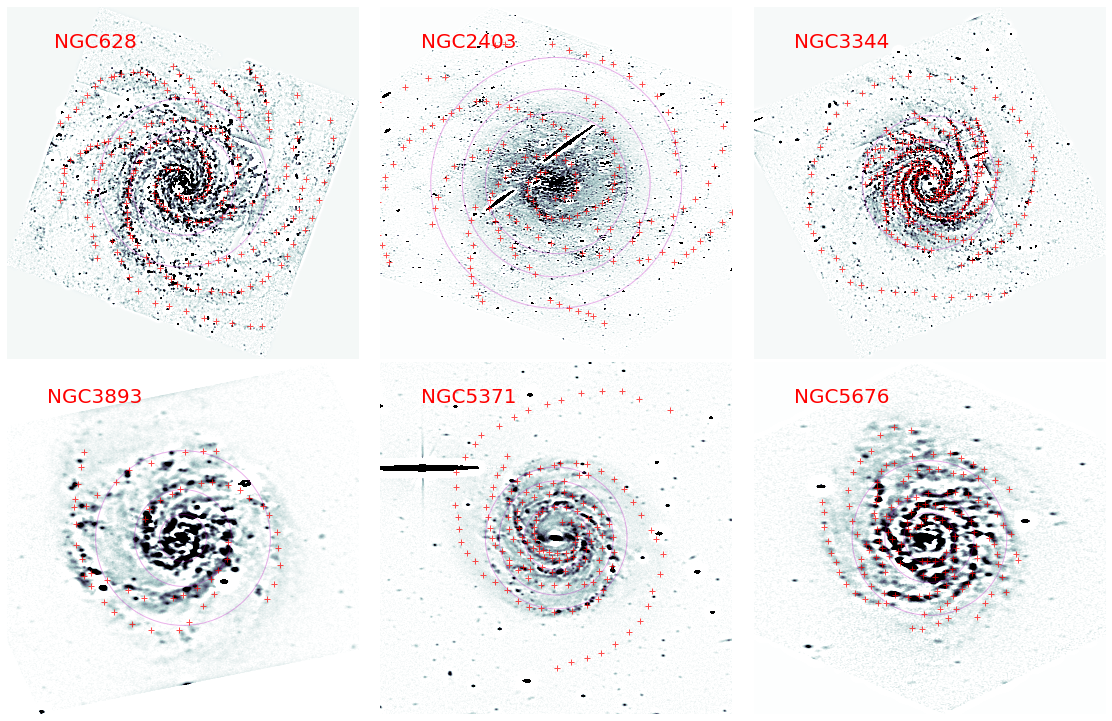

In [94]:
fig, axes = plt.subplots(figsize=[20,13], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name in enumerate(coords.keys()):
    hdulist = pyfits.open(f'./fits/{name}_dr8_g_deproject.fits')
    img_header = hdulist[0].header
    img_data_raw = hdulist[0].data
    
    pts = [[],[]]
    with open(f'./fits/{name}_dr8_g_deproject.reg') as inpreg:
        lines = inpreg.readlines()[3:]
        for ll in lines:
            fl = ll.replace('point(', '').replace(') # point=cross', '').replace(') # point=x', '').split(',')
            pts[0].append(float(fl[0]))
            pts[1].append(float(fl[1]))

    pts = np.array(pts)
    
    xl,yl = img_data_raw.shape
    x0,y0 = int(xl/2), int(yl/2)
    size = min(x0,y0)
    img_data_raw_ = img_data_raw[x0-size:x0+size, y0-size:y0+size]
    
    ax = axes[ind]
    lims = PercentileInterval(98.5).get_limits(img_data_raw_)
    ax.imshow(unsharp_mask(img_data_raw, radius=10, amount=10., preserve_range=True), vmin=lims[0], vmax=lims[1], cmap=cm.bone_r)
    
    ax.plot(pts[0,:], pts[1,:], '+', color='r', alpha=0.7)
    
    ax.text(0.25, 0.9, name,
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,
           fontsize=20,
           color='r')
    ax.axis('off')
    
    xl,yl = img_data_raw.shape
    y0,x0 = int(xl/2), int(yl/2)
    for cr in rings[name]:
        circle2 = plt.Circle((x0, y0), cr/0.262, color='m', fill=False, alpha=0.3)
        ax.add_patch(circle2)
        
    ax.set_ylim(y0-size,y0+size)
    ax.set_xlim(x0-size,x0+size)
    
#     ax.scatter(x0,y0,100)
fig.subplots_adjust(wspace=0.01, hspace=0.01)    
plt.savefig('dataplot4.png', bbox_inches='tight')
plt.show()

## crs justification

In [107]:
crs_table = r'''NGC628 & $80.2\pm25.3$ & T-W & CO,Halpha & ISM & Williams et al. (2021) \\
--///-- & $85.9\pm28.6$ & offset & HII & stellar & Sakhibov et al. \\
--///-- & $85.9\pm28.6$ & mode & HI & ISM & Sakhibov et al. \\
--///-- & $88.8\pm4.2$ & morph & optical & stellar & Elmegreen \& Elmegreen (1995) \\
--///-- & $91.3\pm20.6$ & T-W & CO,Halpha & ISM & Williams et al. (2021) \\
--///-- & $94.5\pm42.8$ & T-W & MUSE & stellar & Williams et al. (2021) \\
--///-- & $137.0\pm20.9$ & offset & B,Spitzer,GALEX & stellar & Abdeen et al. (2020) \\
--///-- & $138.5\pm20.9$ & offset & B,Spitzer,GALEX & stellar & Abdeen et al. (2020) \\
--///-- & $141.0\pm0.0$ & offset & HII  & nan & Cepa \& Beckman (1990) \\
--///-- & $141.3\pm0.0$ & morph & B? & stellar & Elmegreen et al. (1992) \\
--///-- & $145.2\pm40.4$ & offset & HI, 24~$\upmu$m & both & Tamburro et al. (2008) \\
--///-- & $147.8\pm55.4$ & metallicity & 12+log(O/H) & stellar & Scarano \& Lepine (2012) \\
--///-- & $177.6\pm28.6$ & mode & HI & ISM & Sakhibov et al. \\
--///-- & $180.5\pm28.6$ & offset & HII & stellar & Sakhibov et al. \\
% --///-- & $200.5\pm28.6$ & offset & HII & stellar & Sakhibov et al. \\
% --///-- & $245.0_{-14.0}^{+15.0}$ & spirals & g,r,i & stellar & gri spirals \\
\hline
NGC2403 & $218.4\pm23.4$ & offset & HI, 24mu & both & Tamburro et al. (2008) \\
--///-- & $294.0\pm0.0$ & metallicity & H II  & nan & McCall (1982) \\
--///-- & $304.6\pm0.0$ & morph & HII & ISM & Williams et al. (1975) \\
% --///-- & $390.0_{-32.0}^{+0.0}$ & T-W & Halpha & ISM & Fathi et al. (2009) \\
% --///-- & $392.3\pm35.7$ & metallicity & 12+log(O/H) & stellar & Scarano \& Lepine (2012) \\
\hline
% NGC3344 & $31.6\pm4.2$ & F-B & Halpha, HI & ISM & F-B works \\
% --///-- & $58.7\pm3.8$ & F-B & Halpha, HI & ISM & F-B works \\
NGC3344 & $60.9\pm5.4$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $74.4\pm1.9$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $78.0\pm5.4$ & morph & optical & stellar & Elmegreen \& Elmegreen (1995) \\
--///-- & $79.7\pm1.6$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $93.1\pm1.6$ & F-B & Halpha, HI & ISM & F-B works \\
% --///-- & $102.8\pm2.3$ & F-B & Halpha, HI & ISM & F-B works \\
% --///-- & $115.0\pm5.0$ & spirals & g,r,i & stellar & gri spirals \\
--///-- & $119.6\pm12.9$ & T-W & CO,HI & ISM & Meidt et al. (2009) TWR \\
--///-- & $120.6\pm1.6$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $127.3\pm2.3$ & F-B & Halpha, HI & ISM & F-B works \\
\hline
NGC3893 & $13.0\pm6.2$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $20.8\pm0.0$ & potential-density & H-band & stellar & Buta \& Zhang (2009) \\
--///-- & $34.9\pm4.2$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $36.3\pm2.7$ & morph & optical & stellar & Elmegreen \& Elmegreen (1995) \\
--///-- & $61.0\pm0.0$ & potential-density & H-band & stellar & Buta \& Zhang (2009) \\
--///-- & $63.0\pm3.0$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $66.7\pm6.1$ & model & NIR, Halpha & both & Kranz et al. (2003) \\
% --///-- & $75.2\pm2.0$ & F-B & Halpha, HI & ISM & F-B works \\
% --///-- & $88.8\pm4.5$ & F-B & Halpha, HI & ISM & F-B works \\
\hline
% NGC5371 & $38.0\pm3.0$ & spirals & g,r,i & stellar & gri spirals \\
NGC5371 & $44.3\pm6.1$ & offset & r,J,g,i & stellar & Martinez-Garcia et al. (2008,2011) \\
--///-- & $44.7\pm2.1$ & morph & optical & stellar & Elmegreen \& Elmegreen (1995) \\
--///-- & $66.6\pm13.3$ & offset & r,J,g,i & stellar & Martinez-Garcia et al. (2008,2011) \\
% --///-- & $76.0\pm3.0$ & spirals & g,r,i & stellar & gri spirals \\
--///-- & $93.0_{-16.0}^{+0.0}$ & T-W & Halpha & ISM & Fathi et al. (2009) \\
% --///-- & $97.0\pm4.0$ & spirals & g,r,i & stellar & gri spirals \\
\hline
% NGC5676 & $11.6\pm3.1$ & F-B & Halpha, HI & ISM & F-B works \\
NGC5676 & $18.4\pm1.9$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $21.3\pm1.6$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $23.2\pm0.0$ & potential-density & H-band & stellar & Buta \& Zhang (2009) \\
% --///-- & $32.1\pm1.7$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $36.9\pm5.6$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $38.2\pm0.0$ & potential-density & H-band & stellar & Buta \& Zhang (2009) \\
--///-- & $47.2\pm2.6$ & F-B & Halpha, HI & ISM & F-B works \\
% --///-- & $54.4\pm2.4$ & F-B & Halpha, HI & ISM & F-B works \\
--///-- & $61.2\pm0.0$ & potential-density & H-band & stellar & Buta \& Zhang (2009) \\
--///-- & $68.8_{-12.5}^{+6.3}$ & model & NIR, Halpha & both & Kranz et al. (2003) \\
--///-- & $76.5\pm4.6$ & F-B & Halpha, HI & ISM & F-B works \\'''

crs_cleaned = {}
latest_gal = None
for line in crs_table.split('\n'):
    if line[0] == '%':
        continue
    
    if line.startswith('\hline'):
        continue
    
    if not line.startswith('--///--'):
        name = line.split('&')[0].strip()
        crs_cleaned[name] = []
        latest_gal = name
    
    to_parse = line.split('&')[1].replace('$', '')
    if '\pm' in to_parse:
        cr,cr_err = float(to_parse.split('\pm')[0]), float(to_parse.split('\pm')[1])
        cr_err_l, cr_err_r = cr_err,cr_err
    else:
        # 93.0_{-16.0}^{+0.0}
        cr, cr_err_l, cr_err_r = float(to_parse[:4]), float(to_parse[7:11]), float(to_parse[17:-2])
        
    crs_cleaned[latest_gal].append([cr, cr_err_l, cr_err_r])

In [108]:
crs_cleaned

{'NGC628': [[80.2, 25.3, 25.3],
  [85.9, 28.6, 28.6],
  [85.9, 28.6, 28.6],
  [88.8, 4.2, 4.2],
  [91.3, 20.6, 20.6],
  [94.5, 42.8, 42.8],
  [137.0, 20.9, 20.9],
  [138.5, 20.9, 20.9],
  [141.0, 0.0, 0.0],
  [141.3, 0.0, 0.0],
  [145.2, 40.4, 40.4],
  [147.8, 55.4, 55.4],
  [177.6, 28.6, 28.6],
  [180.5, 28.6, 28.6]],
 'NGC2403': [[218.4, 23.4, 23.4], [294.0, 0.0, 0.0], [304.6, 0.0, 0.0]],
 'NGC3344': [[60.9, 5.4, 5.4],
  [74.4, 1.9, 1.9],
  [78.0, 5.4, 5.4],
  [79.7, 1.6, 1.6],
  [93.1, 1.6, 1.6],
  [119.6, 12.9, 12.9],
  [120.6, 1.6, 1.6],
  [127.3, 2.3, 2.3]],
 'NGC3893': [[13.0, 6.2, 6.2],
  [20.8, 0.0, 0.0],
  [34.9, 4.2, 4.2],
  [36.3, 2.7, 2.7],
  [61.0, 0.0, 0.0],
  [63.0, 3.0, 3.0],
  [66.7, 6.1, 6.1]],
 'NGC5371': [[44.3, 6.1, 6.1],
  [44.7, 2.1, 2.1],
  [66.6, 13.3, 13.3],
  [93.0, -16.0, 0.0]],
 'NGC5676': [[18.4, 1.9, 1.9],
  [21.3, 1.6, 1.6],
  [23.2, 0.0, 0.0],
  [36.9, 5.6, 5.6],
  [38.2, 0.0, 0.0],
  [47.2, 2.6, 2.6],
  [61.2, 0.0, 0.0],
  [68.0, -12.0, 0.3],
  [76.5,

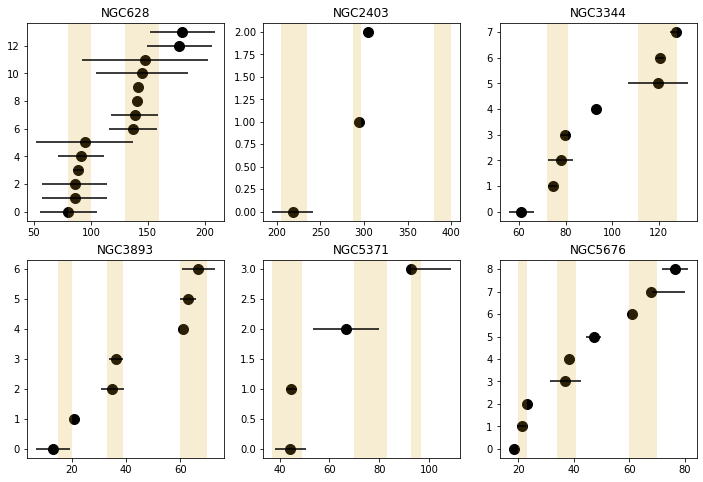

In [114]:
fig, axes = plt.subplots(figsize=[12,8], ncols=3, nrows=2)
axes = axes.flatten()

for ind, name_ in enumerate(rotdict.keys()):
    ax = axes[ind]
#     print('===dsg='*23)
#     print(name_)
#     print('===dsg='*5)
    datas = crs_cleaned[name_]
    ii = 0
    for (cr,ecr_l,ecr_r) in datas:
        ax.scatter(cr, ii, 100, color='k')
        ax.errorbar(cr, ii, xerr=([ecr_l],[ecr_r]), color='k')
        ii+=1
        
    ke = reverse_spirals_set[name_]
#     print('ke:',ke)
    info = consist[ke]
#     print(info)
    for info_ in info:
        cr_l,cr_r = info_
        cr = (cr_r+cr_l)/2.
        cccrs.append(cr)
        method = 'spirals'
        clr = method_color[method]

        ax.axvspan(cr_r, cr_l, facecolor=clr, alpha=0.2)
        
    ax.set_title(name_)
#     ax.legend()
#     ax.set_ylim(0)
    
plt.show()